In [1]:
import pandas as pd
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec, KeyedVectors
from gensim import downloader
import gzip 
import math
import itertools
from time import time
from tqdm import tqdm
import tqdm.notebook as tq
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import os

# Load the model

In [2]:
dir = "D:/google_ngrams/vectors/"
decade_files = [str(1900+10*i)+'_model' for i in range(10)]

decades_dict = OrderedDict()
for i in range(10):
    decades_dict[str(1900+10*i)] = str(1900+10*i)+'_model'
                 
def load_wv(fil, input_dir, kv=False):
    fil = input_dir + fil
    if kv==True:
        return KeyedVectors.load(fil)
    else:
        return gensim.models.Word2Vec.load(fil).wv

def load_wvs(fils, input_dir, kv=False):
    wvs = {}
    print(input_dir)
    for decade, fil in fils.items():
        wv = load_wv(fil, input_dir, kv)
        wvs[decade] = wv
    return wvs
    
col = "histwords_engall" #"histwords_engall", "histwords_engfic", gb_12_full_full", "gb_12_18_02" in progress
year = "1990"
fil = year + "_model" #f'w2vmodel_ng5_{year}.gz_5'
dir = dir + col + "/"

wvs = load_wvs(decades_dict, dir, kv=True)
wv = wvs["1990"]
wv = load_wv("D:/google_ngrams/vectors/gb_12_18_02w2vmodel_ng5_sg_1900.gz_full")

D:/google_ngrams/vectors/histwords_engall/


TypeError: load_wv() missing 1 required positional argument: 'input_dir'

In [40]:
wv = load_wv("gb_12_18_02w2vmodel_ng5_sg_1900.gz_full","D:/google_ngrams/vectors/")

# Check model

In [43]:
#check vocab
def check_words(wv):
    for index, word in enumerate(wv.index_to_key):
        if index == 10:
            break
        print(f"word #{index}/{len(wv.index_to_key)} is {word}")
print(len(wv.index_to_key))
check_words(wv)
def calc_similarity(wv, w1, w2):
    print(f"Similarity between {w1} and {w2}: ", wv.similarity(w1, w2))
w1="nationality"
w2="drunk"
calc_similarity(wv,w1,w2)
print(f"5 most similar to {w1}: ", wv.most_similar(positive=[w1], topn=100))
#find the odd one oute
#wv.doesnt_match([list])

205398
word #0/205398 is the
word #1/205398 is of
word #2/205398 is to
word #3/205398 is in
word #4/205398 is a
word #5/205398 is and
word #6/205398 is that
word #7/205398 is be
word #8/205398 is is
word #9/205398 is it
Similarity between nationality and drunk:  0.08502244
5 most similar to nationality:  [('identity', 0.4444643557071686), ('individuality', 0.43696561455726624), ('answred', 0.4250016510486603), ('solidarity', 0.4182616174221039), ('sortition', 0.41671645641326904), ('naturalization', 0.4062441289424896), ('sinuosity', 0.4050331711769104), ('maintainance', 0.40356898307800293), ('eponym', 0.40118056535720825), ('slise', 0.4005878269672394), ('chaperonage', 0.3994537889957428), ('socle', 0.39280736446380615), ('domicil', 0.3916386067867279), ('extraterritoriality', 0.39141836762428284), ('southren', 0.39090386033058167), ('gromes', 0.3908720016479492), ('alcazaba', 0.3904528319835663), ('courso', 0.3899408280849457), ('daringness', 0.388894647359848), ('mutilator', 0.3886

In [19]:
wv.most_similar(positive="class", negative="school", topn=40)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:783: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('third', 0.3267263174057007),
 ('race', 0.30735039710998535),
 ('second', 0.2833571135997772),
 ('latter', 0.2780537009239197),
 ('conflict', 0.2731015980243683),
 ('movements', 0.2671971917152405),
 ('pattern', 0.2613549828529358),
 ('whereas', 0.24113374948501587),
 ('ethnic', 0.24008890986442566),
 ('backward', 0.2399524748325348),
 ('differences', 0.2383839190006256),
 ('middle', 0.2366330623626709),
 ('gender', 0.23641358315944672),
 ('subtle', 0.23599587380886078),
 ('double', 0.22986195981502533),
 ('racial', 0.2284245491027832),
 ('repeat', 0.22734622657299042),
 ('repeated', 0.22603946924209595),
 ('dimension', 0.22588315606117249),
 ('strategy', 0.2236751914024353),
 ('struggle', 0.22081823647022247),
 ('perceived', 0.22052666544914246),
 ('flick', 0.22037149965763092),
 ('distinct', 0.21952052414417267),
 ('orientation', 0.21947698295116425),
 ('european', 0.21426552534103394),
 ('male', 0.21220993995666504),
 ('identity', 0.21071526408195496),
 ('context', 0.2094451934099

# Import antonym lists

In [7]:
ant_pairs = {}
ant_pairs["affluence"] = pd.read_csv("G:/My Drive/KU/Thesis/data/word_pairs/affluence_antonyms.csv", header = None)#, names = ("rich_ant", "poor_ant"))
ant_pairs["race"] = pd.read_csv("G:/My Drive/KU/Thesis/data/word_pairs/race_antonyms.csv", header = None, names = ("black_ant", "white_ant"))
ant_pairs["gender"] = pd.read_csv("G:/My Drive/KU/Thesis/data/word_pairs/gender_antonyms.csv", header = None, names = ("male_ant", "female_ant"))
ant_pairs["affluence"].rename(columns= {0:ant_pairs["affluence"].iloc[0,0]})

rich                1
0          rich             poor
1        richer           poorer
2       richest          poorest
3     affluence          poverty
4    advantaged    disadvantaged
5      affluent        destitute
6        classy         beggarly
7        costly       economical
8    exorbitant      impecunious
9     expensive      inexpensive
10    exquisite           ruined
11  extravagant      necessitous
12        flush            skint
13   invaluable            cheap
14       lavish       economical
15    luxuriant        penurious
16    luxurious       threadbare
17       luxury            cheap
18      moneyed         unmonied
19      opulent         indigent
20        plush       threadbare
21         posh            plain
22     precious            cheap
23    priceless        worthless
24   privileged  underprivileged
25   propertied         bankrupt
26   prosperous     unprosperous
27    developed   underdeveloped
28     solvency       insolvency
29   successful     unsuccessful
30    sumptuous            plain
31       swanky            basic
32      opulent            needy
33      upscale          squalid
34     valuable        valueless
35      wealthy     impoverished
36        ritzy       ramshackle
37     opulence        indigence
38      solvent        insolvent
39      moneyed        moneyless
40         rich        penniless
41    affluence           penury

# Make word dimensions

In [ ]:
def create_dim(wv, ant_df):
    dims = ant_df.shape
    diffs = []
    cols = ant_df.columns
    #print(f"Positive pole: {cols[0]}\nNegative pole: {cols[1]}")
    missing = []
    for i in range(dims[0]):
        try:
            pos = ant_df.iloc[i,0].lower()
            pos_wv = wv[pos]
        except Exception as e:
            missing.append(pos)
            continue
        try:
            neg = ant_df.iloc[i,1].lower()
            neg_wv = wv[neg]
        except Exception as e:
            missing.append(neg)
            continue
        diff = pos_wv - neg_wv
        diffs.append(diff)
    dimension = sum(diffs)/dims[0]
    #print(f"{missing} not present in vocab")
    return dimension

In [9]:
dims = {}
for key, val in ant_pairs.items():
     dims[key] = create_dim(wv, val)


# Find angles between words & dimensions

In [3]:
def vector_angle(v1, v2):
    v1_norm = v1/np.linalg.norm(v1)
    v2_norm = v2/np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    angle = np.arccos(dot)
    return angle

dim_angles = {dim : {} for dim, vec in dims.items()}
for dim1, vec1 in dims.items():
    for dim2, vec2 in dims.items():
        angle = vector_angle(vec1, vec2)
        dim_angles[dim1][dim2] = angle
        print(f"Angle between {dim1} and {dim2} is {angle}")
dim_angles = pd.DataFrame(dim_angles)

NameError: name 'dims' is not defined

# Project vector onto dimension

In [11]:
#load from file
#matrix = np.loadtxt("1900.txt", usecols = range(1,301))
#as property of KeyedVectors
matrix = wv.get_normed_vectors()
matrix

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]


array([[ 0.10355771, -0.07734421, -0.02192684, ...,  0.05826698,
        -0.08088361, -0.03974426],
       [ 0.01472517,  0.00438747,  0.05774821, ...,  0.00278369,
         0.02739907, -0.09893396],
       [ 0.02167494,  0.01413049, -0.0511252 , ..., -0.05954227,
         0.01125133,  0.02350353],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [12]:
def normify_matrix(matrix):
    for i, row in enumerate(matrix):
        matrix[i] = row/np.linalg.norm(row)
    return matrix

norm_matrix = normify_matrix(matrix)

In [13]:
#Project word embeddings onto a dimension
projs = {}
def proj_dim(dim, wv):
    return np.dot(wv, dim)
for dim, dim_vec in dims.items():
    projs[dim] = proj_dim(dim_vec, norm_matrix)
#aff_proj = proj_dim(aff_dim, norm_matrix)
#race_proj = proj_dim(race_dim, norm_matrix)


# Visualise

In [ ]:
def chart_project(proj_1, p1_label, proj_2, p2_label, title, word_list, wv):
    inds = []
    projs = {"dim_1": {}, "dim_2": {}}
    for word in word_list:
        try:
            ind = wv.get_index(word.lower())
            inds.append(ind)
            val1, val2 = proj_1[ind], proj_2[ind]
            #projs = (val1, val2)
            projs["dim_1"][word] = val1
            
            projs["dim_2"][word] = val2
        except Exception as e:
            continue
    projs = pd.DataFrame(projs)
    #return projs
    plt.style.use("ggplot")
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(projs.loc[:, "dim_1"], projs.loc[:, "dim_2"])
    #ax = projs.plot(x="dim_1", y="dim_2", kind="scatter")
    ax.set_xlabel(p1_label)
    ax.set_ylabel(p2_label)
    for idx, row in projs.iterrows():
        ax.annotate(text=row.name, xy=(row["dim_1"], row["dim_2"]), xytext= (3,-8), textcoords="offset points" )
    plt.savefig(title, format="png")
#poor_words = affluence_ants.iloc[:,1].to_list()     

plt.style.use('ggplot')
#proj = chart_project(projs["gender"], "gender", projs["affluence"], "affluence", "G:/My Drive/KU/Thesis/graphs/coha-90-gender-affluence.png", words_dic["occupations1950.txt"], wv)
        

        

# Create/load domains

In [87]:
import wikipedia
def wiki2words(page):
    words = wikipedia.page(page).links
    words_1gram = []
    for word in words:
        spl = word.split()
        if len(spl) > 1:
            continue
        else: 
            words_1gram.append(word)
    return words_1gram

In [89]:
domain_dic = {}
domain_dic["sports"] = wiki2words("List of Sports")
domain_dic["music_genres"] = wiki2words("List of music genres and styles")
domain_dic["lit_genres"] = wiki2words("List of genres")
domain_dic["us_cities"] = wiki2words("List of United States cities by population")
domain_dic["uk_cities"] = wiki2words("List of cities in the United Kingdom")
domain_dic["countries"] = wiki2words('List of sovereign states')
domain_dic["art_movs"] = wiki2words('List of art movements')
domain_dic["hobbies"] = wiki2words('List of hobbies')
domain_dic["subcultures"] = wiki2words('List of subcultures')


In [123]:
#from data.domain import domains
print(os.getcwd())
garg_dicts = ["occupations1950.txt", "adjectives_appearance.txt",  'adjectives_appearance.txt',
 'adjectives_intelligencegeneral.txt', 'adjectives_otherization.txt', 'adjectives_princeton.txt',
 'adjectives_sensitive.txt', 'adjectives_williamsbest.csv', 'adjectives_williamsbest.txt',
 'personalitytraits_original.txt', 'occupations1950_professional.txt']

words_dic = {}
for dic in data_dicts:
    li = open(f"G:/My Drive/KU/Thesis/data/garg/{dic}", encoding="utf-8").readlines()
    domain_dic[dic[:-4]] = [el.strip() for el in li]
    
doms = [ 'virtues.txt', 'vices.txt', 'genres.txt', 'emotions.txt', 'housing.txt', 'housing_uk.txt',
 'clothing.txt', 'white_trash.txt', 'old_rich.txt', 'new_rich.txt', 'u.txt', 'new_u.txt', 'non_u.txt',
 'refined.txt', 'unrefined.txt']
for dic in doms:
    li = open(f"G:/My Drive/KU/Thesis/data/domains/{dic}").readlines()
    domain_dic[dic[:-4]] = [el.strip() for el in li]
domain_dic.keys()

G:\My Drive\KU\Thesis\data\domains


dict_keys(['sports', 'music_genres', 'lit_genres', 'us_cities', 'uk_cities', 'countries', 'art_movs', 'hobbies', 'subcultures', 'occupations1950.txt', 'adjectives_appearance.txt', 'adjectives_intelligencegeneral.txt', 'adjectives_otherization.txt', 'adjectives_princeton.txt', 'adjectives_sensitive.txt', 'adjectives_williamsbest.csv', 'adjectives_williamsbest.txt', 'personalitytraits_original.txt', 'occupations1950_professional.txt', 'virtues.txt', 'vices.txt', 'genres.txt', 'emotions.txt', 'housing.txt', 'housing_uk.txt', 'clothing.txt', 'white_trash.txt', 'old_rich.txt', 'new_rich.txt', 'u.txt', 'new_u.txt', 'non_u.txt', 'refined.txt', 'unrefined.txt', 'occupations1950', 'adjectives_appearance', 'adjectives_intelligencegeneral', 'adjectives_otherization', 'adjectives_princeton', 'adjectives_sensitive', 'adjectives_williamsbest', 'personalitytraits_original', 'occupations1950_professional', 'virtues', 'vices', 'genres', 'emotions', 'housing', 'housing_uk', 'clothing', 'white_trash', 'o

In [114]:
virtues	 = ['acceptance','accomplishment','accountability','accuracy','achievement','adaptability','alertness','altruism','ambition','amusement','assertiveness','attentive','awareness','balance','beauty','boldness','bravery','brilliance','calm','candor','capable','careful','certainty','challenge','charity','cleanliness','clear','clever','comfort','commitment','common','sense','communication','community','compassion','competence','concentration','confidence','connection','consciousness','consistency','contentment','contribution','control','conviction','cooperation','courage','courtesy','creation','creativity','credibility','curiosity','decisive','decisiveness','dedication','dependability','determination','development','devotion','dignity','discipline','discovery','drive','effectiveness','efficiency','empathy','empower','endurance','energy','enjoyment','enthusiasm','equality','ethical','excellence','experience','exploration','expressive','fairness','family','famous','fearless','feelings','ferocious','fidelity','focus','foresight','fortitude','freedom','friendship','fun','generosity','genius','giving','goodness','grace','gratitude','greatness','growth','happiness','hard','work','harmony','health','honesty','honor','hope','humility','humor','imagination','improvement','independence','individuality','innovation','inquisitive','insightful','inspiring','integrity','intelligence','intensity','intuitive','joy','justice','kindness','knowledge','lawful','leadership','learning','liberty','logic','love','loyalty','mastery','maturity','meaning','moderation','motivation','openness','optimism','order','organization','originality','passion','patience','peace','performance','persistence','playfulness','poise','potential','power','present','productivity','professionalism','prosperity','purpose','quality','realistic','reason','recognition','recreation','reflective','respect','responsibility','restraint','results-oriented','reverence','rigor','risk','satisfaction','security','self-reliance','selfless','sensitivity','serenity','service','sharing','significance','silence','simplicity','sincerity','skill','skillfulness','smart','solitude','spirit','spirituality','spontaneous','stability','status','stewardship','strength','structure','success','support','surprise','sustainability','talent','teamwork','temperance','thankful','thorough','thoughtful','timeliness','tolerance','toughness','traditional','tranquility','transparency','trust','trustworthy','truth','understanding','uniqueness','unity','valor','victory','vigor','vision','vitality','wealth','welcoming','winning','wisdom','wonder'] #https://scottjeffrey.com/core-values-list/
vices = ['zealousness','wrath','wildness','weakness','wastefulness','voracity','vengeful','vanity','vainglory','untrustworthiness','unloving','unfaithfulness','twisted','tricky','triteness','treasonous','thoughtlessness','thieving','tetchiness','sullenness','sulkiness','stubbornness','stingy','spite','snobbishness','sloth','short-sightedness','senselessness','selfishness','self-pity','self-indulgence','self-importance','secrecy','ruthlessness','rudeness','rowdiness','resentfulness','recklessness','rashness','rage','promiscuity','profligacy','pretentiousness','preposterousness','prejudice','pride','pomposity','pitilessness','petulance','perversion','offensiveness','obstinacy','obsessive','obduracy','narcissism','murderous','moodiness','moroseness','misogyny','mercilessness','melancholic','manipulative','malice','madness','lust','lunacy','licentiousness','liar','lethargy','laziness','lavishness','languor','jealousy','irritability','intemperance','insolence','impetuosity','impatience','insanity','injustice','inflexibility','infidelity','indolence','incompetence','inanity','idleness','idiocy','hysteria','hypocrite','hubris','hedonism','heartlessness','haughtiness','hatred','hastiness','grumpiness','grouchiness','greed','gluttony','glumness','fussiness','foolishness','fearfulness','fanaticism','falseness','faithlessness','extremism','erratic','envy','egoism','doubt','disrespect','disloyalty','dishonesty','discourtesy','despairing','depressive','dementedness','deceitfulness','decadence','cupidity','cruelty','craziness','crankiness','crabbiness','cowardice','covetousness','corruption','condescension','conceit','cheating','chauvinism','callousness','brutality','bragging','boastfulness','bigotry','bias','avarice','arrogance','antagonism','anger','alcoholism','aggression','adultery','addiction'] #https://listography.com/saeglopur/list_of_character_vices/0583315557
genres = ['rock', 'funk', 'bluesgrass', 'blues', 'country', 'bebop', 'jazz', 'classical', 'rnb', 'disco', 'hiphop', 'punk','soul', 'rap', 'pop', 'folk', 'metal', 'reggae', 'techno', 'house', 'ambient', 'swing','gospel', 'ska','indie', 'psychedelic', 'grunge', 'bluegrass', 'shoegaze','opera']
emotions = ['anger','contempt,','disgust,','revulsion','envy,','jealousy','exasperation,','frustration','aggravation,','agitation,','annoyance,','grouchiness,','grumpiness,','irritation','anger,','bitterness,','dislike,','ferocity,','fury,','hate,','hostility,','loathing,','outrage,','rage,','resentment,','scorn,','spite,','vengefulness,','wrath','torment','fear','alarm,','fear,','fright,','horror,','hysteria,','mortification,','panic,','shock,','terror','anxiety,','apprehension,','distress,','dread,','nervousness,','tenseness,','uneasiness,','worry','joy','amusement,','bliss,','cheerfulness,','delight,','ecstasy,','elation,','enjoyment,','euphoria,','gaiety,','gladness,','glee,','happiness,','jolliness,','joviality,','joy,','jubilation,','satisfaction','contentment,','pleasure','enthrallment,','rapture','eagerness,','hope,','optimism','pride,','triumph','relief','enthusiasm,','excitement,','exhilaration,','thrill,','zeal,','zest','love','adoration,','affection,','attraction,','caring,','compassion,','fondness,','liking,','love,','sentimentality,','tenderness','longing','arousal,','desire,','infatuation,','lust,','passion','sadness','disappointment,','dismay,','displeasure','alienation,','defeat,','dejection,','embarrassment,','homesickness,','humiliation,','insecurity,','isolation,','insult,','loneliness,','neglect,','rejection','depression,','despair,','gloom,','glumness,','grief,','hopelessness,','melancholy,','misery,','sadness,','sorrow,','unhappiness,','woe','guilt,','regret,','remorse,','shame','agony,','anguish,','hurt,','suffering','pity,','sympathy','surprise','amazement,','astonishment,','surprise']
housing = ['Condominium', 'manor', 'barn', 'Co-op','Townhome','Bungalow','Cottage','Cabin','Chalet','suite','Barndominium','house','Mansion','McMansion','Houseboat,','Castle','Palace','Chateau','Villa','Manor','Fort']
housing_us = ["ranch", 'apartment','Ranch-Style']
housing_u = ['detached', 'semi-detached', 'flat','terraced']
clothing = ['apron', 'baldric', 'basque', 'bathing suit', 'bathrobe', 'bib and brace', 'bikini', 'blouse', 'body', 'body stocking', 'bodysuit', 'boubou', 'braces or (U.S.) suspenders', 'bustier', 'cardigan or (informal) cardie or cardy', 'chapeau', 'chausses', 'cilice', 'coat', 'coatee', 'codpiece', 'cummerbund or kummerbund', 'dolman', 'dress', 'dressing gown', 'dungarees', 'frock', 'galluses (dialect)', 'gambeson', 'garter', 'gilet', 'glove', 'gown', 'haik', 'halter', 'hauberk', 'hose', 'housecoat', 'jacket', 'jerkin', 'jubbah', 'jumper', 'jump suit', 'jupon', 'kaftan or caftan', 'kameez', 'kanzu', 'kaross', 'kimono', 'kilt', 'kittel', 'leotard', 'loincloth or breechcloth', 'maillot', 'manteau', 'mantle (archaic)', 'mitten', 'muff', 'negligee or negligée', 'nightshirt', 'overall', 'overcoat', 'overskirt', 'oversleeve', 'paletot', 'pallium', 'partlet', 'pashmina', 'peignoir', 'plaid', 'pullover', 'pyjamas or (U.S.) pajamas', 'robe', 'rompers', 'sash', 'sanbenito', 'sari or saree', 'sarong', 'serape', 'shalwar', 'shawl', 'shift', 'shirt', 'shoe', 'shorts', 'skirt', 'skivvy mainly US, slang)', 'smock', 'sock', 'sporran', 'surcoat', 'sweater', 'swimming trunks or trunks', 'swimsuit', 'tallit', 'tanga', 'tank top', 'thong', 'tie or (U.S.) necktie', 'tights or hose', 'toga', 'T-shirt or tee shirt', 'tunic', 'undergarment', 'waistcoat or (U.S. &amp; Canad.) vest', 'wrap', 'wrapper', 'yashmak or yashmac']
white_trash = ['Waste peoples', ' Offscourings', ' Lubbers', ' Bogtrotters', ' Rascals', ' Squatters', ' Crackers', ' Clay-eaters', ' Tackies', ' Mudsills', ' Scalawags', ' Briar hoppers', 'Hillbillies', ' Low-downers', ' White niggers', ' Degenerates', ' Rednecks', 'Waste people', ' Offscouring', ' Lubber', ' Bogtrotter', ' Rascal', ' Rubbish', ' Squatter', ' Cracker', ' Clay-eater', ' Tackie', ' Mudsill', ' Scalawag', ' Briar hopper', ' Hillbilly', ' Low-downer', ' White nigger', ' Degenerate', ' White trash', ' Redneck', ' Trailer trash', ' Swamp people']

new_rich = ["new-rich", "upstart", "parvenu", "arriviste", "social-climber", "yuppie", "self-made"]
old_rich = ["old-rich", "upper-class","aristocracy", "aristocratic", "aristocrat", "gentry", "nobility","gentleman"]
u = ['Madame', 'Bike','Bicycle','Dinner jacket','Knave','Vegetables','Ice','Scent','Looking-glass','Chimneypiece','Graveyard','Spectacles','false-teeth','Mad','Jam','Napkin','Sofa','Lavatory','loo','Rich','Good health','Lunch', 'Pudding','Sitting-room','Writing paper','What?','Wireless','Schoolmaster','schoolmistress']
non_u = ['Dear','Cycle','Dress suit','Jack', 'Greens','Ice cream','Perfume','Mirror','Mantelpiece','Cemetery','Glasses', 'dentures','Mental','Preserve','Serviette','Settee', 'couch', 'toilet','Wealthy','Cheers','Dinner','Sweet','Lounge','Notepaper','Pardon?','Radio','Teacher']	
refined = ["classy", "cultivated", "stylish", "delicate", "discriminating", "elegant", "genteel", "polished", "precise", "sophisticated", "subtle", "tasteful", "urbane", "suave", "swanky", "high-brow", "ritzy", "posh", "plush", "spiffy", "well-bred", "well-mannered", "aristocratic", "patrician", "cultivated", "learned", "cultured"]
unrefined = ["inelegant", "uncultured", "unrefined", "unsophisticated", "unstylish", "ignorant", "uncivilized", "tacky", "sleazy", "gaudy"]

os.chdir("G:/My Drive/KU/Thesis/data/domains/")
a = [ 'virtues.txt',
 'vices.txt',
 'genres.txt',
 'emotions.txt',
 'housing.txt',
 'housing_uk.txt',
 'clothing.txt',
 'white_trash.txt',
 'old_rich.txt',
 'new_rich.txt',
 'u.txt',
 'new_u.txt',
 'non_u.txt',
 'refined.txt',
 'unrefined.txt']
l = [i[:-4] for i in a]
l

['virtues',
 'vices',
 'genres',
 'emotions',
 'housing',
 'housing_uk',
 'clothing',
 'white_trash',
 'old_rich',
 'new_rich',
 'u',
 'new_u',
 'non_u',
 'refined',
 'unrefined']

# Create taggers

In [19]:
import nltk
from nltk.tag import UnigramTagger
from nltk.corpus import brown
from nltk.corpus import wordnet as wn


# Using data
train_sents = brown.tagged_sents()
  
# Initializing
unitagger = UnigramTagger(train_sents)
#unitagger.tag(["Hello"])[0]
def uni_tagger(word, multiple=False):
    return nltk.pos_tag([word])[0][1]
    return unitagger.tag([word])[0][1]

#https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_unigram_tagger.htm
unitagger.tag(["love"])

[('love', 'NN')]

In [20]:
from nltk.corpus import wordnet as wn
def wn_tagger(word, multiple=True):
    if multiple==True:
        poses = list(set([syn.pos() for syn in wn.synsets(word)]))
        return poses
    return wn.synsets(word)[0].pos()#[len(word)+1:len(word)+3]
    
wn_tagger("hippopotamus")
#https://www.nltk.org/howto/wordnet.html
#wn.synsets("bottom")

['n']

# Most similar functions

In [36]:
#select = "JJ" for adjective, "NN" for noun, "V" for verb.
def most_similar_tag(word, wv, tagger, dim=False, topn=100, selectn=10, select=False): 
    '''Finds most similar words and splits them according to tag, returning dict of tag: [list of words],
    select can be defined so as to only return certain word types'''
    #FIX: ADD MULTIPLE WORD TYPES - if multiple word meanings, add to al lists
    if dim == True:
        pos = []
        neg = []
        not_pres = []
        for x in word[0]:
            try:
                w = wv[x]
                pos.append(x)
            except:
                not_pres.append(x)
        for x in word[1]:
            try:
                w = wv[x]
                neg.append(x)
            except:
                not_pres.append(x)
        lst = wv.most_similar(positive=pos, negative = neg, topn=topn)
    else: 
        lst =  wv.most_similar(positive=[word], topn=topn)
    tags = {}
    for el in lst:
        #print(el[0])
        try:
            tgs = tagger(el[0], multiple=True)
        except Exception as e:
            print(e)
            #print("Word untaggable!")
            tgs = [None]
        for tg in tgs:
            try:
                tags[tg].append(el[0])
            except:
                tags[tg] = [el[0]]
    if select:
        try: 
            words = [v for k,v in tags.items() if k == select][0]
        except: 
            words = []
        
    else:
        words = []
        for k,v in tags.items():
            words += v
        #tags = {k:v for k,v in tags.items() if k == select}
    try:
            words = words[:selectn]
    except Exception as e:
        print(e)
        pass
    if not dim:
        #print("Words not present in embeddings:", not_pres)
        pass
    return words

In [22]:
def most_similar_wlist(word, wv, word_list, dim=False, topn=100, selectn=10): 
    '''Finds all most similar words that are within a defined list.
    Input: word= 2-tuple of lists (pos, neg) if wanting dimension (dim=True), else one word.
    topn = top n similar words, selectn = amount of top words returned
    returns list of tuples of (word, similarity score)'''
    #print(f"5 most similar to {w1}: ", wv.most_similar(positive=[word], topn=n))
    if dim == True:
        pos = []
        neg = []
        not_pres = []
        for x in word[0]:
            try:
                wv = wv[x]
                pos.append(x)
            except:
                not_pres.append(x)
        for x in word[1]:
            try:
                wv = wv[x]
                neg.append(x)
            except:
                not_pres.append(x)
                
        lst = wv.most_similar(positive=pos, negative = neg, topn=topn)
    else: 
        lst =  wv.most_similar(positive=[word], topn=topn)
    words = []
    for el in lst:
        #print(el[0])
        if el[0] in word_list:
            words.append(el)
    try:
        words = words[:total_n]
    except:
        pass
    #print("Words not present in embeddings:", not_pres)
    return words

In [23]:
def stereotype_through_time(wvs, word, word_list, type="tag", select="JJ", selectn=10, topn= 100): #INCOMPLETE
    '''wvs is an ordered dict, domain_list is a list of words, type is type of tagging, 
    select is specifics of tag'''
    stereotypes = {decade: {} for decade, wv in wvs.items()}
    if type == "tag":
        df = {}
        for decade, wv in wvs.items():
            df[decade] = {i: "" for i in range(selectn)}
            sims = most_similar_tag(word, wv, uni_tagger, topn=100, selectn=selectn, select=select)
            for i,sim in enumerate(sims):  
                df[decade][i] = sim
    else:
        df= {}
        for decade, wv in wvs.items():
            df[decade] = {i: "" for i in range(selectn)}
            sims = most_similar_wlist(word, wv, word_list, topn=100, selectn=selectn)
            for i,sim in enumerate(sims):  
                df[decade][i] = sim[0]
    df = pd.DataFrame(df)
    return df
        
stereotype_through_time(wvs, word="hate", word_list = virtues, type="word_list", select="JJ", selectn=10, topn= 10000)

NameError: name 'virtues' is not defined

In [307]:
def measure_word_space(wv, norm_matrix, word_list): 
    for i, word in enumerate(word_list):
        vec = wv[word].reshape(1,300)
        if i == 0:
            mat = vec
            continue
        mat = np.vstack((mat, vec))
    norms = []
    for row in mat:
        reshape = row.reshape(1,300)
        distances = mat-reshape
        norm = np.linalg.norm(np.mean(distances, axis=0))
        norms.append(norm)
    return np.mean(norms)

wls = [["love", "hate", "beauty"], ["man", "woman"],["masculine", "feminine"],["man", "male", "men", "masculine"], ["donkey", "speaker", "glass", "handle"]]
for l in wls:
    print(l, "\n", measure_word_space(wv, norm_matrix, l))
#measure_word_space(wv, norm_matrix, word_list)


['love', 'hate', 'beauty'] 
 0.6731011
['man', 'woman'] 
 0.39630747
['masculine', 'feminine'] 
 0.3998845
['man', 'male', 'men', 'masculine'] 
 0.75645196
['donkey', 'speaker', 'glass', 'handle'] 
 0.8329221


Outputs:
Analysis: Ordered dict of decades: lists in descending order of relevance of tuples with (word, similarity score)
Vis: heatmap going down -> polar graph split up into domains with circles of most similar

Analysis: list of values of each domain item's projection onto dimension
VIs: graphs of domain on dim1 x dim2



In [4]:
status_ants = pd.read_csv("G:/My Drive/KU/Thesis/data/word_pairs/status_antonyms.csv").set_index("index")
word =(status_ants["high_status"].to_list(), status_ants["low_status"].to_list())
word = ([x for x in word[0] if str(x) != "nan"],[x for x in word[1] if str(x) != "nan"])
word

KeyError: "None of ['index'] are in the columns"

In [119]:
#wvs["1990"]
most_similar_tag(word=wlists, wv=wvs["1990"], dim=True, tagger=wn_tagger)
#wv.most_similar(positive=word[0], negative = word[1], topn=1000)
#.most_similar(positive=["hello", "yes"], topn=1000)


Words not present in embeddings: [nan, 'plebian', 'disrespected', nan, nan, nan, nan, nan, nan, nan, nan]


['fiddles',
 'instructs',
 'fosters',
 'wallop',
 'hardens',
 'besieging',
 'whopping',
 'conduce',
 'hoses',
 'overshadowing']

In [133]:
wvs["1990"].most_similar("hello", topn= 1000000)[-37000] #first 13k have a value, 

('campus', -0.09316840022802353)

In [ ]:
#to calculate all distances: negate vector from matrix, calc the norm for each row, 
#and then argsort, which then gets plugged into vocab
def get_most_similar(wv, norm_matrix, word):
    vocab = wv.index_to_key
    distance_vecs = norm_matrix - np.array(wv[word]).reshape(1,300)
    norms = np.linalg.norm(distance_vecs, axis= 1)
    args = list(np.argsort(norms, axis=0))
    sorted_vocab = [(vocab[ind], norm_matrix[ind]) for ind in args]
    return sorted_vocab
get_most_similar(wv, norm_matrix, "hello")[13000]

In [78]:
class AllDecsIterator():
    def __init__(self, coll, dims):
        self.coll = coll
        self.dims = dims
        self.stereotypes = {}
        
    def iterate(self):
        self.input_dir = f"D:/google_ngrams/vectors/{coll}/"
        decades_dict = OrderedDict()
        for i in range(10):
            decades_dict[str(1900+10*i)] = str(1900+10*i)+'_model'
        self.wvs = load_wvs(decades_dict, self.input_dir, kv=True)
        self.ants = {dec : {} for dec, val in self.wvs.items()}
        self.projs = {dec : {} for dec, val in self.wvs.items()}
        self.dim_vecs = {dec : {} for dec, val in self.wvs.items()}
        self.angles = {dec : {} for dec, val in self.wvs.items()}
        self.norm_matrix = {dec : {} for dec, val in self.wvs.items()}
        self.stereotypes = {dec : {} for dec, val in self.wvs.items()}
        
        for dec, wv in self.wvs.items():
            matrix = wv.get_normed_vectors()
            self.norm_matrix[dec] = normify_matrix(matrix)

            for dim in self.dims:
                self.ants[dec][dim] = pd.read_csv(f"G:/My Drive/KU/Thesis/data/word_pairs/{dim}_antonyms.csv", header = None, names = ("pos_ant", "neg_ant"))
                self.ants[dec][dim] = self.ants[dec][dim].rename(columns= {"pos_ant":self.ants[dec][dim].iloc[0,0],"neg_ant":self.ants[dec][dim].iloc[0,1]})
                self.dim_vecs[dec][dim] = create_dim(wv, self.ants[dec][dim])
                self.projs[dec][dim] = proj_dim(self.dim_vecs[dec][dim], norm_matrix)

            self.angles[dec] = {dim : {} for dim in self.dims}
            for dim1 in self.dims:
                for dim2 in self.dims:
                    angle = vector_angle(vec1, vec2)
                    self.angles[dec][dim1][dim2] = angle
            self.angles[dec] = pd.DataFrame(self.angles[dec])
            
    def stereotype_through_time(self, word, word_list=[], type="tag", select="a", selectn=10, topn= 100): #INCOMPLETE
        '''wvs is an ordered dict, domain_list is a list of words, type is type of tagging, 
        select is specifics of tag'''
        self.stereotypes[word] = {}
        if type == "tag":
            df = {}
            for decade, wv in wvs.items():
                df[decade] = {i: "" for i in range(selectn)}
                sims = most_similar_tag(word, wv, wn_tagger, topn=100, selectn=selectn, select=select)
                for i,sim in enumerate(sims):  
                    df[decade][i] = sim
        else:
            df= {}
            for decade, wv in wvs.items():
                df[decade] = {i: "" for i in range(selectn)}
                sims = most_similar_wlist(word, wv, word_list, topn=100, selectn=selectn)
                for i,sim in enumerate(sims):  
                    df[decade][i] = sim[0]
        df = pd.DataFrame(df)
        self.stereotypes[word] = df
    
    def word_charts_through_time(self, word_list, dim_1, dim_2, title):
        '''dims = list of two strings which refer to dimensions to be projected on'''
        try:
            os.makedirs(f"G:/My Drive/KU/Thesis/Outputs/Graphs/{title}_{dim_1}_{dim_2}")
        except:
            pass
        for dec, wv in self.wvs.items():
            fname = f"G:/My Drive/KU/Thesis/Outputs/Graphs/{title}_{dim_1}_{dim_2}/{self.coll}_{dec}.png"
            dim1_label = self.ants[dec][dim_1].columns[1] + " <------ " + dim_1 + " ------> " + self.ants[dec][dim_1].columns[0]
            dim2_label = self.ants[dec][dim_2].columns[1] + " <------ " + dim_2 + " ------> " + self.ants[dec][dim_2].columns[0]
            chart_project(proj_1=self.projs[dec][dim_1], p1_label=dim1_label, proj_2=self.projs[dec][dim_2], p2_label=dim2_label, title=fname, word_list=word_list, wv=wv)
            print(f"{fname} SAVED")


In [83]:
coll = "histwords_coha"

#input_dir = f"D:/google_ngrams/vectors/{coll}"

dims = ["affluence", "cultivation", "status", "gender", "race", "morality", "education"]

coha_all_decs = AllDecsIterator(coll, dims)
coha_all_decs.iterate()
#for occ in words_dic["occupations1950.txt"]:
#    coha_all_decs.stereotype_through_time(occ)

D:/google_ngrams/vectors/histwords_coha/


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:624: RuntimeWarning: invalid value encountered in true_divide
  return self.vectors / self.norms[..., np.newaxis]


"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia' not present"
"Key 'bodyboarding' not present"
"Key 'bodybuilding' not present"
"Key 'bojutsu' 

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1900.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1910.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1920.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1930.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1940.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1950.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1960.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1970.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1980.png SAVED
"Key '5x5x5' not present"
"Key '6x6x6' not present"
"Key '7x7x7' not present"
"Key 'aflx' not present"
"Key 'abseiling' not present"
"Key 'aikido' not present"
"Key 'airsoft' not present"
"Key 'aizkolaritza' not present"
"Key 'angleball' not present"
"Key 'aquathlon' not present"
"Key 'arimaa' not present"
"Key 'austus' not present"
"Key 'autocross' not present"
"Key 'autograss' not present"
"Key 'baseketball' not present"
"Key 'bmx' not present"
"Key 'backstroke' not present"
"Key 'baguazhang' not present"
"Key 'bajiquan' not present"
"Key 'balkline' not present"
"Key 'bando' not present"
"Key 'bartitsu' not present"
"Key 'baseball5' not present"
"Key 'battōjutsu' not present"
"Key 'beagling' not present"
"Key 'biathlon' not present"
"Key 'biribol' not present"
"Key 'bo-taoshi' not present"
"Key 'boardercross' not present"
"Key 'bobsleigh' not present"
"Key 'bocce' not present"
"Key 'boccia

G:/My Drive/KU/Thesis/Outputs/Graphs/sports_affluence_cultivation/histwords_coha_1990.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key 'bule

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1900.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1910.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1920.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1930.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1940.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1950.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1960.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1970.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1980.png SAVED
"Key '4-beat' not present"
"Key 'afrobeat' not present"
"Key 'afrobeats' not present"
"Key 'afroswing' not present"
"Key 'aggrotech' not present"
"Key 'alegrías' not present"
"Key 'alt-jazz' not present"
"Key 'amapiano' not present"
"Key 'anti-folk' not present"
"Key 'apala' not present"
"Key 'austropop' not present"
"Key 'avant-prog' not present"
"Key 'azonto' not present"
"Key 'baila' not present"
"Key 'barococo' not present"
"Key 'baul' not present"
"Key 'bebop' not present"
"Key 'bhawaiya' not present"
"Key 'bikutsi' not present"
"Key 'biomusicology' not present"
"Key 'bitpop' not present"
"Key 'blackgaze' not present"
"Key 'bolero' not present"
"Key 'boogaloo' not present"
"Key 'boogie-woogie' not present"
"Key 'breakbeat' not present"
"Key 'breakcore' not present"
"Key 'breakstep' not present"
"Key 'britpop' not present"
"Key 'brostep' not present"
"Key 'budots' not present"
"Key

G:/My Drive/KU/Thesis/Outputs/Graphs/music_genres_affluence_cultivation/histwords_coha_1990.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_17536/1399249756.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 10))


G:/My Drive/KU/Thesis/Outputs/Graphs/lit_genres_affluence_cultivation/histwords_coha_1900.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key '

G:/My Drive/KU/Thesis/Outputs/Graphs/lit_genres_affluence_cultivation/histwords_coha_1920.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key '

G:/My Drive/KU/Thesis/Outputs/Graphs/lit_genres_affluence_cultivation/histwords_coha_1940.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key '

G:/My Drive/KU/Thesis/Outputs/Graphs/lit_genres_affluence_cultivation/histwords_coha_1960.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key '

G:/My Drive/KU/Thesis/Outputs/Graphs/lit_genres_affluence_cultivation/histwords_coha_1980.png SAVED
"Key '4x' not present"
"Key '8½' not present"
"Key 'atb' not present"
"Key 'advergame' not present"
"Key 'aftershow' not present"
"Key 'amélie' not present"
"Key 'anarcho-capitalism' not present"
"Key 'anime' not present"
"Key 'antihero' not present"
"Key 'archenemy' not present"
"Key 'atompunk' not present"
"Key 'auteur' not present"
"Key 'avionics' not present"
"Key 'backstory' not present"
"Key 'bangsian' not present"
"Key 'basslines' not present"
"Key 'bathos' not present"
"Key 'bejeweled' not present"
"Key 'bildungsroman' not present"
"Key 'biopic' not present"
"Key 'biopunk' not present"
"Key 'biotechnologies' not present"
"Key 'blaxploitation' not present"
"Key 'breakbeat' not present"
"Key 'bridgerton' not present"
"Key 'bruceploitation' not present"
"Key 'calligrafismo' not present"
"Key 'candide' not present"
"Key 'cantastoria' not present"
"Key 'catastasis' not present"
"Key '

G:/My Drive/KU/Thesis/Outputs/Graphs/uk_cities_affluence_cultivation/histwords_coha_1900.png SAVED
"Key 'brechin' not present"
"Key 'caer' not present"
"Key 'civitas' not present"
"Key 'conurbation' not present"
"Key 'dunfermline' not present"
"Key 'kirkwall' not present"
"Key 'lichfield' not present"
"Key 'lisburn' not present"
"Key 'luton' not present"
"Key 'nennius' not present"
"Key 'newry' not present"
"Key 'peterborough' not present"
"Key 'ripon' not present"
"Key 'southend-on-sea' not present"
"Key 'stoke-on-trent' not present"
"Key 'swansea' not present"
"Key 'truro' not present"
"Key 'urbanisation' not present"
"Key 'wolverhampton' not present"
G:/My Drive/KU/Thesis/Outputs/Graphs/uk_cities_affluence_cultivation/histwords_coha_1910.png SAVED
"Key 'brechin' not present"
"Key 'caer' not present"
"Key 'civitas' not present"
"Key 'conurbation' not present"
"Key 'dunfermline' not present"
"Key 'kirkwall' not present"
"Key 'lichfield' not present"
"Key 'lisburn' not present"
"Key 'l

G:/My Drive/KU/Thesis/Outputs/Graphs/countries_affluence_cultivation/histwords_coha_1900.png SAVED
"Key 'abkhazia' not present"
"Key 'abyei' not present"
"Key 'aceh' not present"
"Key 'adjara' not present"
"Key 'andorra' not present"
"Key 'anguilla' not present"
"Key 'aruba' not present"
"Key 'bangsamoro' not present"
"Key 'barbuda' not present"
"Key 'belarus' not present"
"Key 'belize' not present"
"Key 'benin' not present"
"Key 'bhutan' not present"
"Key 'biome' not present"
"Key 'bonaire' not present"
"Key 'botswana' not present"
"Key 'brunei' not present"
"Key 'burundi' not present"
"Key 'cameroon' not present"
"Key 'cartography' not present"
"Key 'comoros' not present"
"Key 'curaçao' not present"
"Key 'diarchy' not present"
"Key 'djibouti' not present"
"Key 'dominica' not present"
"Key 'eswatini' not present"
"Key 'exosphere' not present"
"Key 'gabon' not present"
"Key 'gagauzia' not present"
"Key 'galmudug' not present"
"Key 'geophysics' not present"
"Key 'gilgit-baltistan' not p

G:/My Drive/KU/Thesis/Outputs/Graphs/countries_affluence_cultivation/histwords_coha_1930.png SAVED
"Key 'abkhazia' not present"
"Key 'abyei' not present"
"Key 'aceh' not present"
"Key 'adjara' not present"
"Key 'andorra' not present"
"Key 'anguilla' not present"
"Key 'aruba' not present"
"Key 'bangsamoro' not present"
"Key 'barbuda' not present"
"Key 'belarus' not present"
"Key 'belize' not present"
"Key 'benin' not present"
"Key 'bhutan' not present"
"Key 'biome' not present"
"Key 'bonaire' not present"
"Key 'botswana' not present"
"Key 'brunei' not present"
"Key 'burundi' not present"
"Key 'cameroon' not present"
"Key 'cartography' not present"
"Key 'comoros' not present"
"Key 'curaçao' not present"
"Key 'diarchy' not present"
"Key 'djibouti' not present"
"Key 'dominica' not present"
"Key 'eswatini' not present"
"Key 'exosphere' not present"
"Key 'gabon' not present"
"Key 'gagauzia' not present"
"Key 'galmudug' not present"
"Key 'geophysics' not present"
"Key 'gilgit-baltistan' not p

G:/My Drive/KU/Thesis/Outputs/Graphs/countries_affluence_cultivation/histwords_coha_1960.png SAVED
"Key 'abkhazia' not present"
"Key 'abyei' not present"
"Key 'aceh' not present"
"Key 'adjara' not present"
"Key 'andorra' not present"
"Key 'anguilla' not present"
"Key 'aruba' not present"
"Key 'bangsamoro' not present"
"Key 'barbuda' not present"
"Key 'belarus' not present"
"Key 'belize' not present"
"Key 'benin' not present"
"Key 'bhutan' not present"
"Key 'biome' not present"
"Key 'bonaire' not present"
"Key 'botswana' not present"
"Key 'brunei' not present"
"Key 'burundi' not present"
"Key 'cameroon' not present"
"Key 'cartography' not present"
"Key 'comoros' not present"
"Key 'curaçao' not present"
"Key 'diarchy' not present"
"Key 'djibouti' not present"
"Key 'dominica' not present"
"Key 'eswatini' not present"
"Key 'exosphere' not present"
"Key 'gabon' not present"
"Key 'gagauzia' not present"
"Key 'galmudug' not present"
"Key 'geophysics' not present"
"Key 'gilgit-baltistan' not p

G:/My Drive/KU/Thesis/Outputs/Graphs/countries_affluence_cultivation/histwords_coha_1990.png SAVED
"Key '4′33″' not present"
"Key 'abhinavagupta' not present"
"Key 'abstraction-création' not present"
"Key 'aeropittura' not present"
"Key 'aestheticism' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'al-andalus' not present"
"Key 'altermodern' not present"
"Key 'anti-art' not present"
"Key 'antipodeans' not present"
"Key 'artist-in-residence' not present"
"Key 'artivism' not present"
"Key 'atonality' not present"
"Key 'avant-funk' not present"
"Key 'avant-garde' not present"
"Key 'avant-pop' not present"
"Key 'avant-prog' not present"
"Key 'avant-punk' not present"
"Key 'axiology' not present"
"Key 'balthus' not present"
"Key 'biedermeier' not present"
"Key 'biennale' not present"
"Key 'brandalism' not present"
"Key 'brutalism' not present"
"Key 'caravaggisti' not present"
"Key 'chinoiserie' not present"
"Key 'cinquecento' not present"
"Key 'cloiso

G:/My Drive/KU/Thesis/Outputs/Graphs/art_movs_affluence_cultivation/histwords_coha_1910.png SAVED
"Key '4′33″' not present"
"Key 'abhinavagupta' not present"
"Key 'abstraction-création' not present"
"Key 'aeropittura' not present"
"Key 'aestheticism' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'al-andalus' not present"
"Key 'altermodern' not present"
"Key 'anti-art' not present"
"Key 'antipodeans' not present"
"Key 'artist-in-residence' not present"
"Key 'artivism' not present"
"Key 'atonality' not present"
"Key 'avant-funk' not present"
"Key 'avant-garde' not present"
"Key 'avant-pop' not present"
"Key 'avant-prog' not present"
"Key 'avant-punk' not present"
"Key 'axiology' not present"
"Key 'balthus' not present"
"Key 'biedermeier' not present"
"Key 'biennale' not present"
"Key 'brandalism' not present"
"Key 'brutalism' not present"
"Key 'caravaggisti' not present"
"Key 'chinoiserie' not present"
"Key 'cinquecento' not present"
"Key 'cloison

G:/My Drive/KU/Thesis/Outputs/Graphs/art_movs_affluence_cultivation/histwords_coha_1930.png SAVED
"Key '4′33″' not present"
"Key 'abhinavagupta' not present"
"Key 'abstraction-création' not present"
"Key 'aeropittura' not present"
"Key 'aestheticism' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'al-andalus' not present"
"Key 'altermodern' not present"
"Key 'anti-art' not present"
"Key 'antipodeans' not present"
"Key 'artist-in-residence' not present"
"Key 'artivism' not present"
"Key 'atonality' not present"
"Key 'avant-funk' not present"
"Key 'avant-garde' not present"
"Key 'avant-pop' not present"
"Key 'avant-prog' not present"
"Key 'avant-punk' not present"
"Key 'axiology' not present"
"Key 'balthus' not present"
"Key 'biedermeier' not present"
"Key 'biennale' not present"
"Key 'brandalism' not present"
"Key 'brutalism' not present"
"Key 'caravaggisti' not present"
"Key 'chinoiserie' not present"
"Key 'cinquecento' not present"
"Key 'cloison

G:/My Drive/KU/Thesis/Outputs/Graphs/art_movs_affluence_cultivation/histwords_coha_1950.png SAVED
"Key '4′33″' not present"
"Key 'abhinavagupta' not present"
"Key 'abstraction-création' not present"
"Key 'aeropittura' not present"
"Key 'aestheticism' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'al-andalus' not present"
"Key 'altermodern' not present"
"Key 'anti-art' not present"
"Key 'antipodeans' not present"
"Key 'artist-in-residence' not present"
"Key 'artivism' not present"
"Key 'atonality' not present"
"Key 'avant-funk' not present"
"Key 'avant-garde' not present"
"Key 'avant-pop' not present"
"Key 'avant-prog' not present"
"Key 'avant-punk' not present"
"Key 'axiology' not present"
"Key 'balthus' not present"
"Key 'biedermeier' not present"
"Key 'biennale' not present"
"Key 'brandalism' not present"
"Key 'brutalism' not present"
"Key 'caravaggisti' not present"
"Key 'chinoiserie' not present"
"Key 'cinquecento' not present"
"Key 'cloison

G:/My Drive/KU/Thesis/Outputs/Graphs/art_movs_affluence_cultivation/histwords_coha_1970.png SAVED
"Key '4′33″' not present"
"Key 'abhinavagupta' not present"
"Key 'abstraction-création' not present"
"Key 'aeropittura' not present"
"Key 'aestheticism' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'al-andalus' not present"
"Key 'altermodern' not present"
"Key 'anti-art' not present"
"Key 'antipodeans' not present"
"Key 'artist-in-residence' not present"
"Key 'artivism' not present"
"Key 'atonality' not present"
"Key 'avant-funk' not present"
"Key 'avant-garde' not present"
"Key 'avant-pop' not present"
"Key 'avant-prog' not present"
"Key 'avant-punk' not present"
"Key 'axiology' not present"
"Key 'balthus' not present"
"Key 'biedermeier' not present"
"Key 'biennale' not present"
"Key 'brandalism' not present"
"Key 'brutalism' not present"
"Key 'caravaggisti' not present"
"Key 'chinoiserie' not present"
"Key 'cinquecento' not present"
"Key 'cloison

G:/My Drive/KU/Thesis/Outputs/Graphs/art_movs_affluence_cultivation/histwords_coha_1990.png SAVED
"Key 'about.com' not present"
"Key 'acroyoga' not present"
"Key 'airsoft' not present"
"Key 'alcester' not present"
"Key 'anime' not present"
"Key 'ant-keeping' not present"
"Key 'antiquing' not present"
"Key 'aquascaping' not present"
"Key 'audiophile' not present"
"Key 'automobilism' not present"
"Key 'bmx' not present"
"Key 'beachcombing' not present"
"Key 'beatboxing' not present"
"Key 'beekeeping' not present"
"Key 'birdwatching' not present"
"Key 'blacksmithing' not present"
"Key 'blogging' not present"
"Key 'bodybuilding' not present"
"Key 'bonsai' not present"
"Key 'breadmaking' not present"
"Key 'breakdancing' not present"
"Key 'cnbc' not present"
"Key 'canoeing' not present"
"Key 'canyoning' not present"
"Key 'cardistry' not present"
"Key 'cheerleading' not present"
"Key 'cheesemaking' not present"
"Key 'cornhole' not present"
"Key 'cosplaying' not present"
"Key 'couponing' not p

G:/My Drive/KU/Thesis/Outputs/Graphs/hobbies_affluence_cultivation/histwords_coha_1910.png SAVED
"Key 'about.com' not present"
"Key 'acroyoga' not present"
"Key 'airsoft' not present"
"Key 'alcester' not present"
"Key 'anime' not present"
"Key 'ant-keeping' not present"
"Key 'antiquing' not present"
"Key 'aquascaping' not present"
"Key 'audiophile' not present"
"Key 'automobilism' not present"
"Key 'bmx' not present"
"Key 'beachcombing' not present"
"Key 'beatboxing' not present"
"Key 'beekeeping' not present"
"Key 'birdwatching' not present"
"Key 'blacksmithing' not present"
"Key 'blogging' not present"
"Key 'bodybuilding' not present"
"Key 'bonsai' not present"
"Key 'breadmaking' not present"
"Key 'breakdancing' not present"
"Key 'cnbc' not present"
"Key 'canoeing' not present"
"Key 'canyoning' not present"
"Key 'cardistry' not present"
"Key 'cheerleading' not present"
"Key 'cheesemaking' not present"
"Key 'cornhole' not present"
"Key 'cosplaying' not present"
"Key 'couponing' not pr

G:/My Drive/KU/Thesis/Outputs/Graphs/hobbies_affluence_cultivation/histwords_coha_1930.png SAVED
"Key 'about.com' not present"
"Key 'acroyoga' not present"
"Key 'airsoft' not present"
"Key 'alcester' not present"
"Key 'anime' not present"
"Key 'ant-keeping' not present"
"Key 'antiquing' not present"
"Key 'aquascaping' not present"
"Key 'audiophile' not present"
"Key 'automobilism' not present"
"Key 'bmx' not present"
"Key 'beachcombing' not present"
"Key 'beatboxing' not present"
"Key 'beekeeping' not present"
"Key 'birdwatching' not present"
"Key 'blacksmithing' not present"
"Key 'blogging' not present"
"Key 'bodybuilding' not present"
"Key 'bonsai' not present"
"Key 'breadmaking' not present"
"Key 'breakdancing' not present"
"Key 'cnbc' not present"
"Key 'canoeing' not present"
"Key 'canyoning' not present"
"Key 'cardistry' not present"
"Key 'cheerleading' not present"
"Key 'cheesemaking' not present"
"Key 'cornhole' not present"
"Key 'cosplaying' not present"
"Key 'couponing' not pr

G:/My Drive/KU/Thesis/Outputs/Graphs/hobbies_affluence_cultivation/histwords_coha_1950.png SAVED
"Key 'about.com' not present"
"Key 'acroyoga' not present"
"Key 'airsoft' not present"
"Key 'alcester' not present"
"Key 'anime' not present"
"Key 'ant-keeping' not present"
"Key 'antiquing' not present"
"Key 'aquascaping' not present"
"Key 'audiophile' not present"
"Key 'automobilism' not present"
"Key 'bmx' not present"
"Key 'beachcombing' not present"
"Key 'beatboxing' not present"
"Key 'beekeeping' not present"
"Key 'birdwatching' not present"
"Key 'blacksmithing' not present"
"Key 'blogging' not present"
"Key 'bodybuilding' not present"
"Key 'bonsai' not present"
"Key 'breadmaking' not present"
"Key 'breakdancing' not present"
"Key 'cnbc' not present"
"Key 'canoeing' not present"
"Key 'canyoning' not present"
"Key 'cardistry' not present"
"Key 'cheerleading' not present"
"Key 'cheesemaking' not present"
"Key 'cornhole' not present"
"Key 'cosplaying' not present"
"Key 'couponing' not pr

G:/My Drive/KU/Thesis/Outputs/Graphs/hobbies_affluence_cultivation/histwords_coha_1970.png SAVED
"Key 'about.com' not present"
"Key 'acroyoga' not present"
"Key 'airsoft' not present"
"Key 'alcester' not present"
"Key 'anime' not present"
"Key 'ant-keeping' not present"
"Key 'antiquing' not present"
"Key 'aquascaping' not present"
"Key 'audiophile' not present"
"Key 'automobilism' not present"
"Key 'bmx' not present"
"Key 'beachcombing' not present"
"Key 'beatboxing' not present"
"Key 'beekeeping' not present"
"Key 'birdwatching' not present"
"Key 'blacksmithing' not present"
"Key 'blogging' not present"
"Key 'bodybuilding' not present"
"Key 'bonsai' not present"
"Key 'breadmaking' not present"
"Key 'breakdancing' not present"
"Key 'cnbc' not present"
"Key 'canoeing' not present"
"Key 'canyoning' not present"
"Key 'cardistry' not present"
"Key 'cheerleading' not present"
"Key 'cheesemaking' not present"
"Key 'cornhole' not present"
"Key 'cosplaying' not present"
"Key 'couponing' not pr

G:/My Drive/KU/Thesis/Outputs/Graphs/hobbies_affluence_cultivation/histwords_coha_1990.png SAVED
"Key 'acculturation' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'anarcho-punk' not present"
"Key 'bdsm' not present"
"Key 'beatnik' not present"
"Key 'biculturalism' not present"
"Key 'bioculture' not present"
"Key 'biopunk' not present"
"Key 'birdwatching' not present"
"Key 'bodybuilding' not present"
"Key 'bohemianism' not present"
"Key 'breakdancing' not present"
"Key 'bōsōzoku' not present"
"Key 'chav' not present"
"Key 'childfree' not present"
"Key 'chonga' not present"
"Key 'cosplay' not present"
"Key 'cottagecore' not present"
"Key 'cross-cultural' not present"
"Key 'cryptozoology' not present"
"Key 'culturalism' not present"
"Key 'cultureme' not present"
"Key 'culturgen' not present"
"Key 'culturology' not present"
"Key 'culturomics' not present"
"Key 'curehead' not present"
"Key 'cyberculture' not present"
"Key 'cybergoth' not present"
"K

G:/My Drive/KU/Thesis/Outputs/Graphs/subcultures_affluence_cultivation/histwords_coha_1920.png SAVED
"Key 'acculturation' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'anarcho-punk' not present"
"Key 'bdsm' not present"
"Key 'beatnik' not present"
"Key 'biculturalism' not present"
"Key 'bioculture' not present"
"Key 'biopunk' not present"
"Key 'birdwatching' not present"
"Key 'bodybuilding' not present"
"Key 'bohemianism' not present"
"Key 'breakdancing' not present"
"Key 'bōsōzoku' not present"
"Key 'chav' not present"
"Key 'childfree' not present"
"Key 'chonga' not present"
"Key 'cosplay' not present"
"Key 'cottagecore' not present"
"Key 'cross-cultural' not present"
"Key 'cryptozoology' not present"
"Key 'culturalism' not present"
"Key 'cultureme' not present"
"Key 'culturgen' not present"
"Key 'culturology' not present"
"Key 'culturomics' not present"
"Key 'curehead' not present"
"Key 'cyberculture' not present"
"Key 'cybergoth' not present

G:/My Drive/KU/Thesis/Outputs/Graphs/subcultures_affluence_cultivation/histwords_coha_1950.png SAVED
"Key 'acculturation' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'anarcho-punk' not present"
"Key 'bdsm' not present"
"Key 'beatnik' not present"
"Key 'biculturalism' not present"
"Key 'bioculture' not present"
"Key 'biopunk' not present"
"Key 'birdwatching' not present"
"Key 'bodybuilding' not present"
"Key 'bohemianism' not present"
"Key 'breakdancing' not present"
"Key 'bōsōzoku' not present"
"Key 'chav' not present"
"Key 'childfree' not present"
"Key 'chonga' not present"
"Key 'cosplay' not present"
"Key 'cottagecore' not present"
"Key 'cross-cultural' not present"
"Key 'cryptozoology' not present"
"Key 'culturalism' not present"
"Key 'cultureme' not present"
"Key 'culturgen' not present"
"Key 'culturology' not present"
"Key 'culturomics' not present"
"Key 'curehead' not present"
"Key 'cyberculture' not present"
"Key 'cybergoth' not present

G:/My Drive/KU/Thesis/Outputs/Graphs/subcultures_affluence_cultivation/histwords_coha_1980.png SAVED
"Key 'acculturation' not present"
"Key 'africanfuturism' not present"
"Key 'afrofuturism' not present"
"Key 'anarcho-punk' not present"
"Key 'bdsm' not present"
"Key 'beatnik' not present"
"Key 'biculturalism' not present"
"Key 'bioculture' not present"
"Key 'biopunk' not present"
"Key 'birdwatching' not present"
"Key 'bodybuilding' not present"
"Key 'bohemianism' not present"
"Key 'breakdancing' not present"
"Key 'bōsōzoku' not present"
"Key 'chav' not present"
"Key 'childfree' not present"
"Key 'chonga' not present"
"Key 'cosplay' not present"
"Key 'cottagecore' not present"
"Key 'cross-cultural' not present"
"Key 'cryptozoology' not present"
"Key 'culturalism' not present"
"Key 'cultureme' not present"
"Key 'culturgen' not present"
"Key 'culturology' not present"
"Key 'culturomics' not present"
"Key 'curehead' not present"
"Key 'cyberculture' not present"
"Key 'cybergoth' not present

G:/My Drive/KU/Thesis/Outputs/Graphs/adjectives_princeton.txt_affluence_cultivation/histwords_coha_1900.png SAVED
"Key 'sportsmanlike' not present"
"Key 'pleasureloving' not present"
"Key 'happy-go-lucky' not present"
"Key 'suggestible' not present"
"Key 'quicktempered' not present"
"Key 'gluttonous' not present"
G:/My Drive/KU/Thesis/Outputs/Graphs/adjectives_princeton.txt_affluence_cultivation/histwords_coha_1910.png SAVED
"Key 'sportsmanlike' not present"
"Key 'pleasureloving' not present"
"Key 'happy-go-lucky' not present"
"Key 'suggestible' not present"
"Key 'quicktempered' not present"
"Key 'gluttonous' not present"


KeyboardInterrupt: 

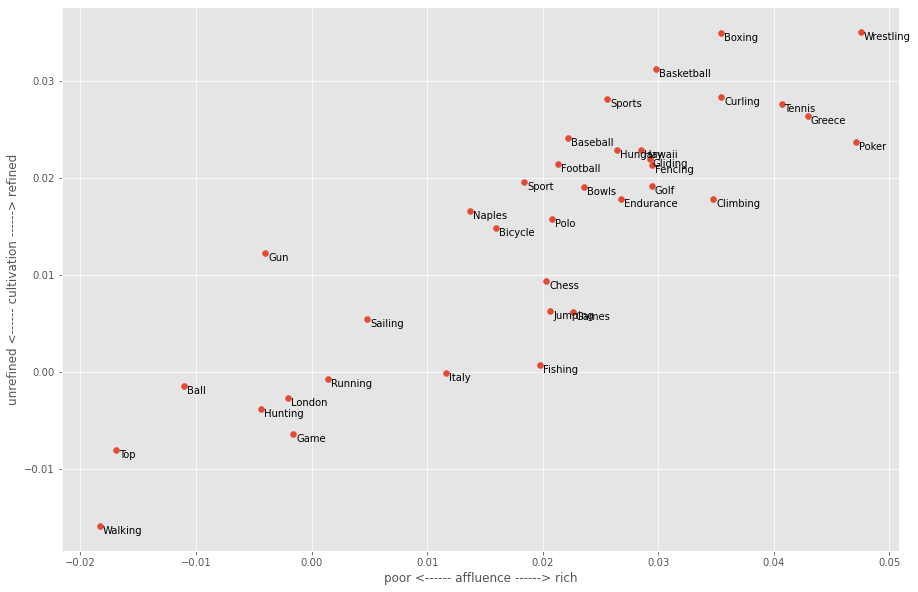

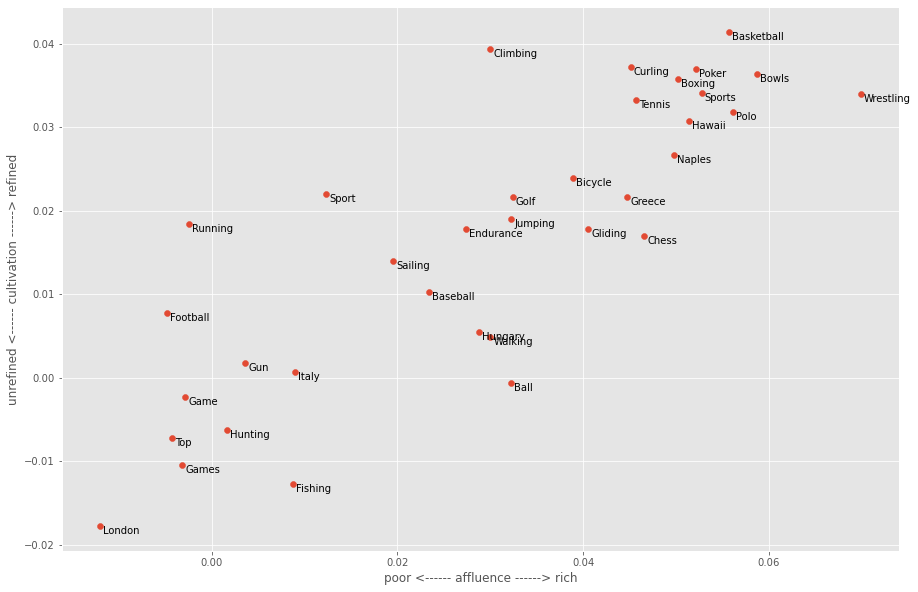

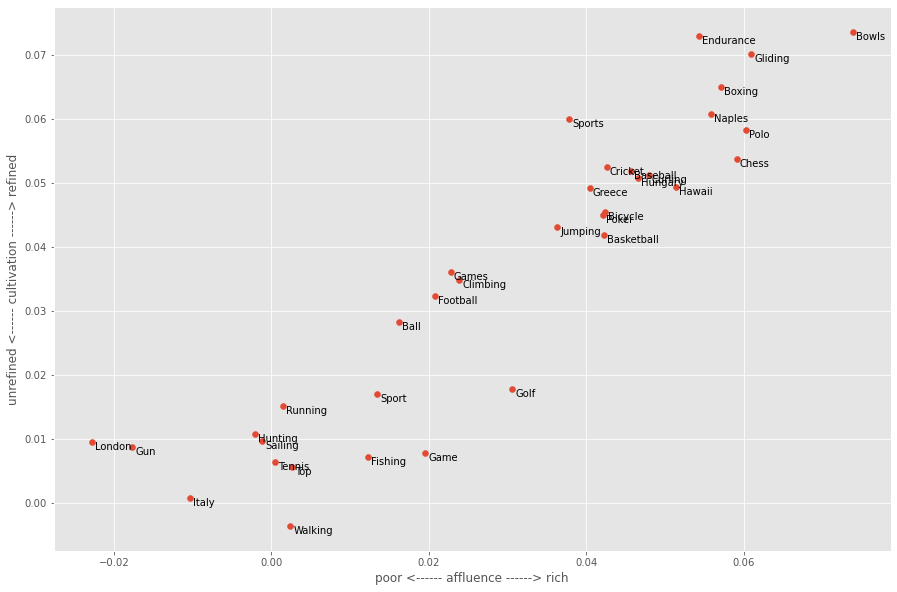

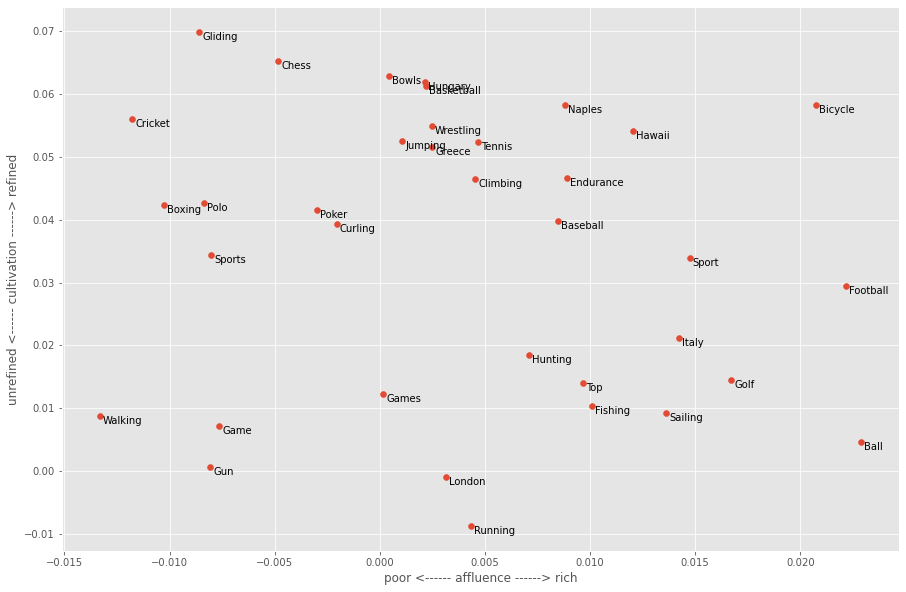

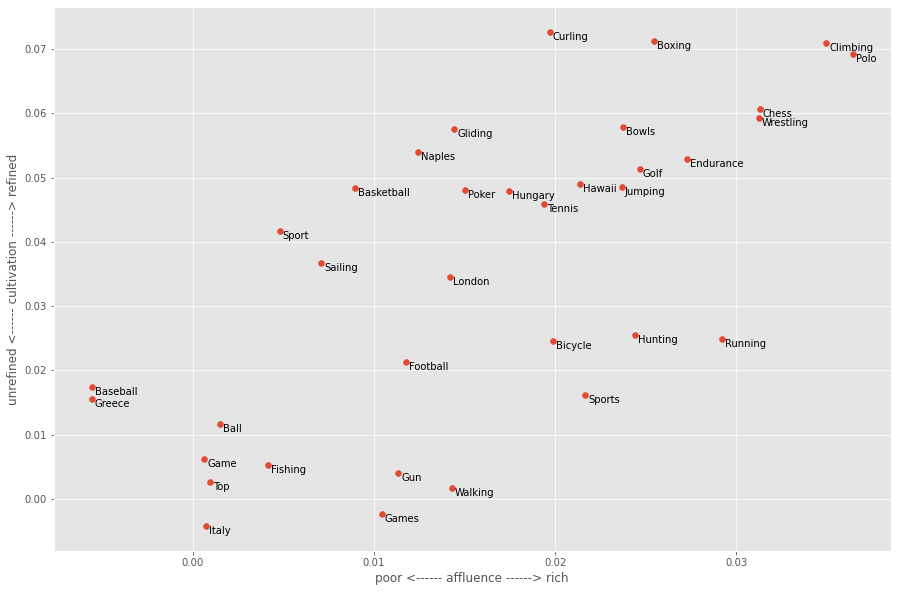

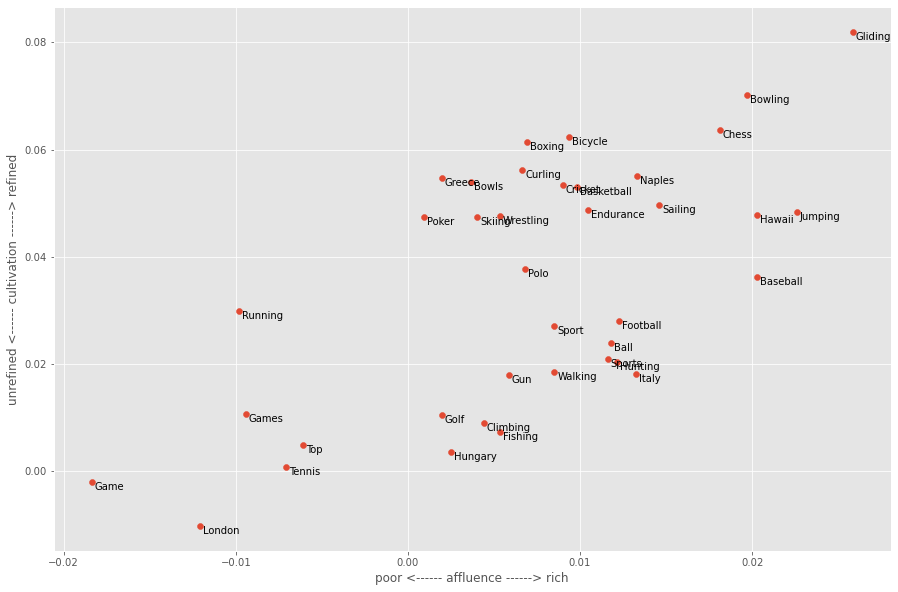

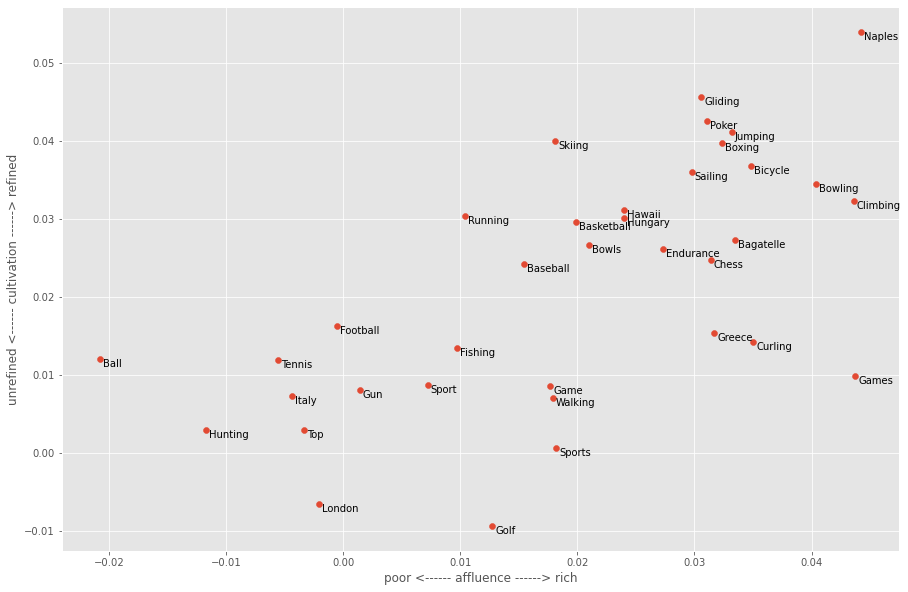

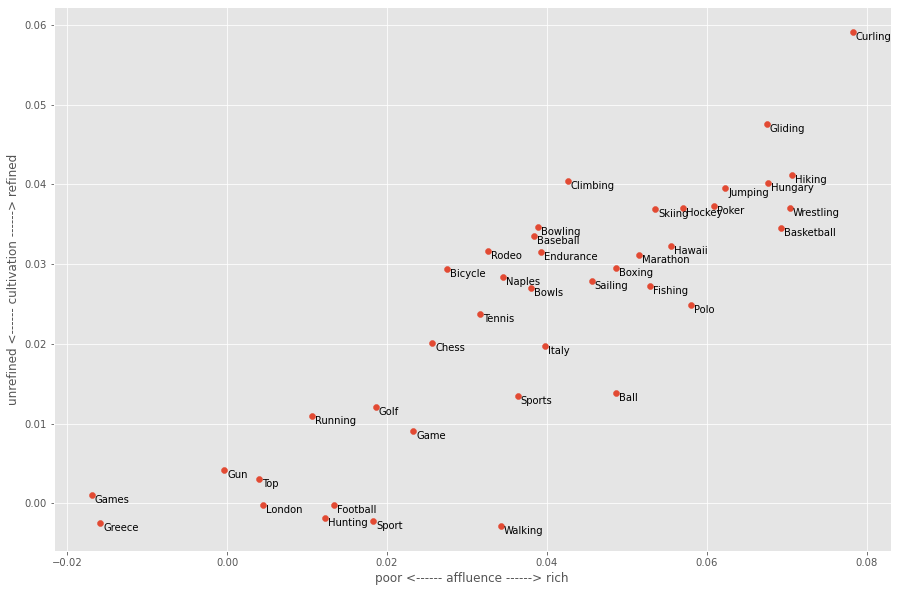

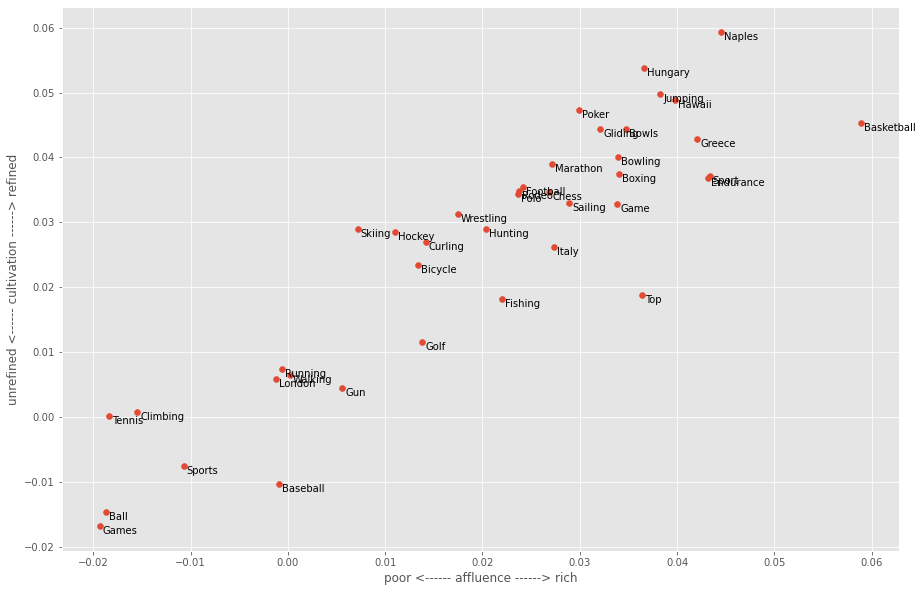

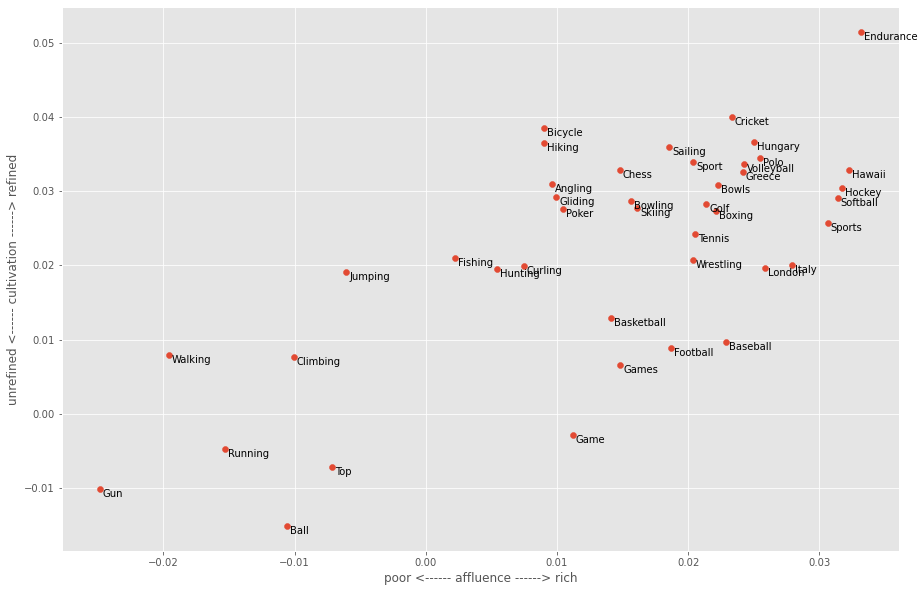

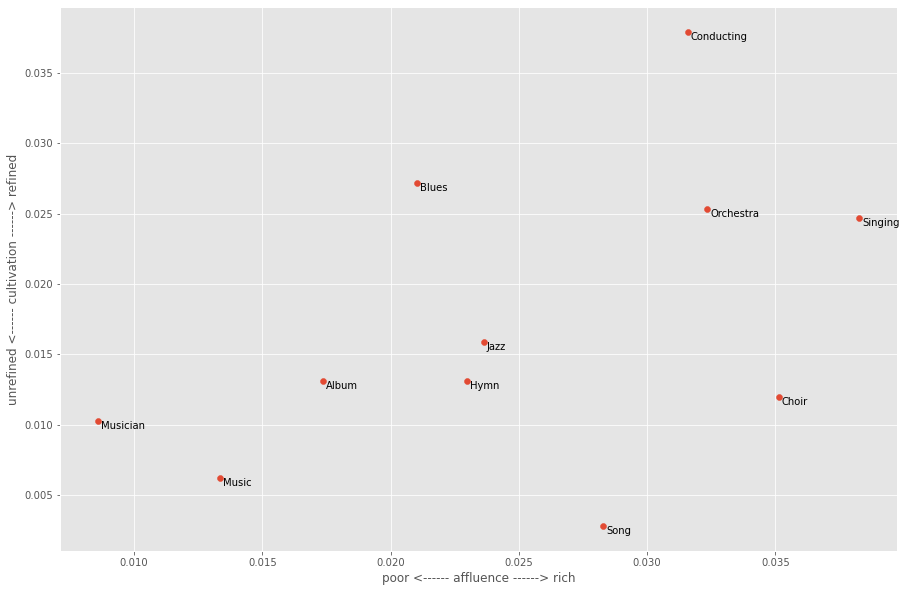

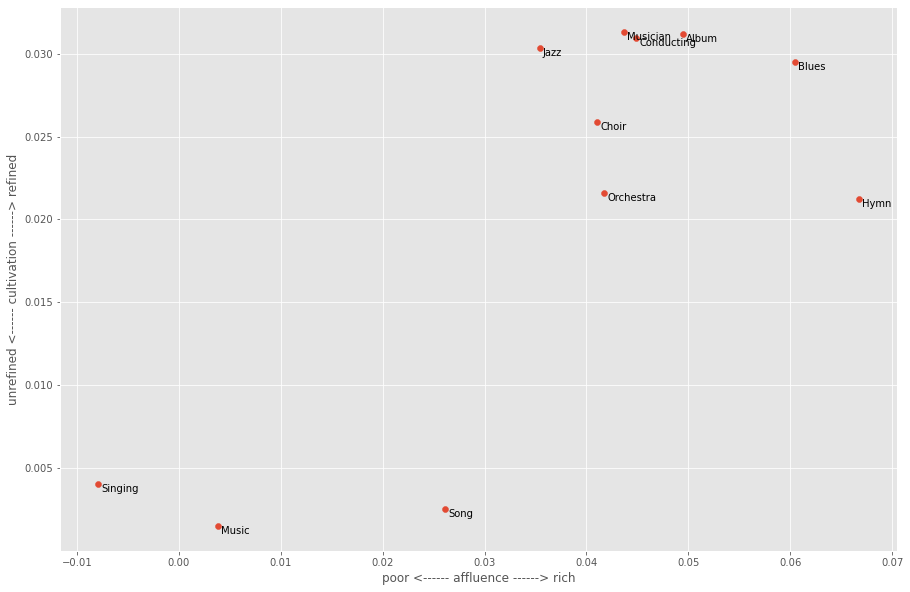

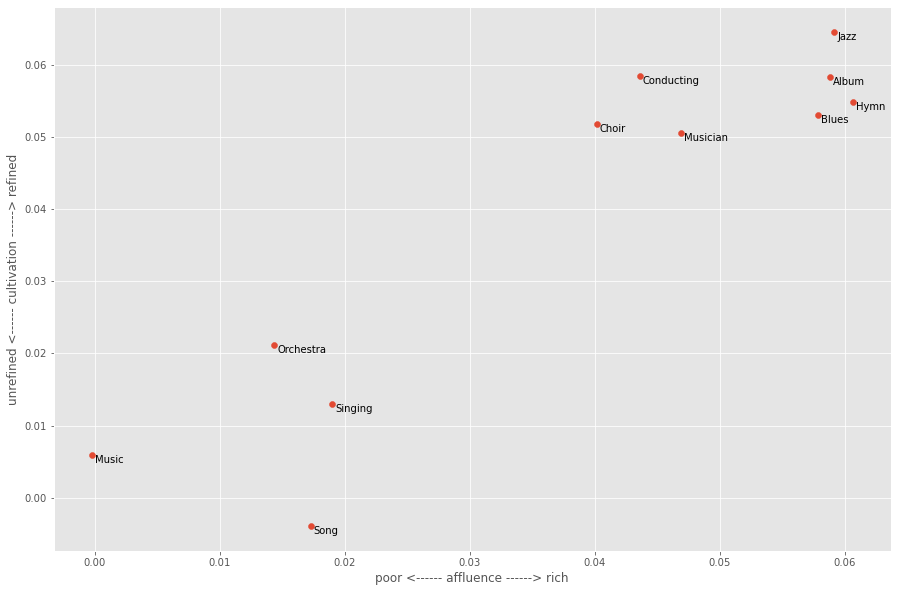

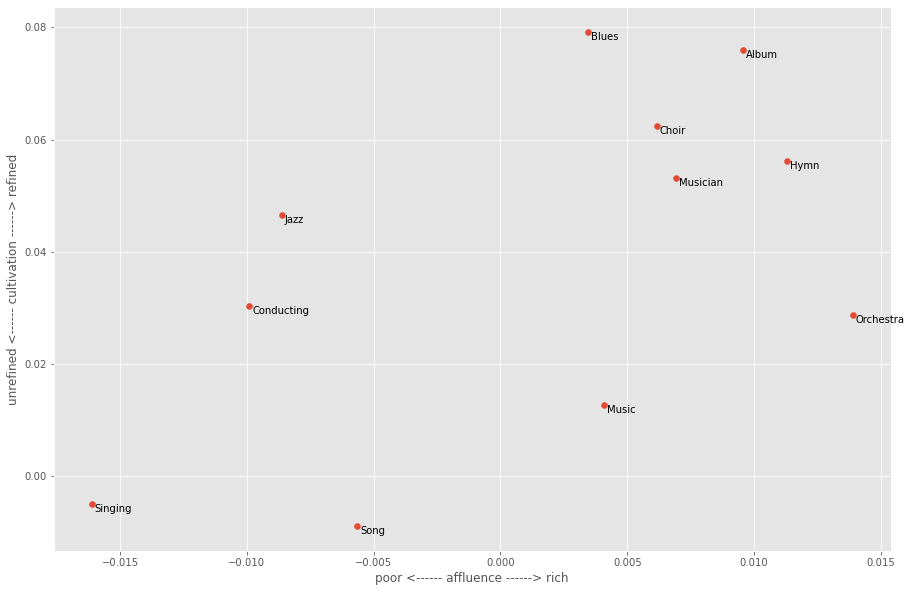

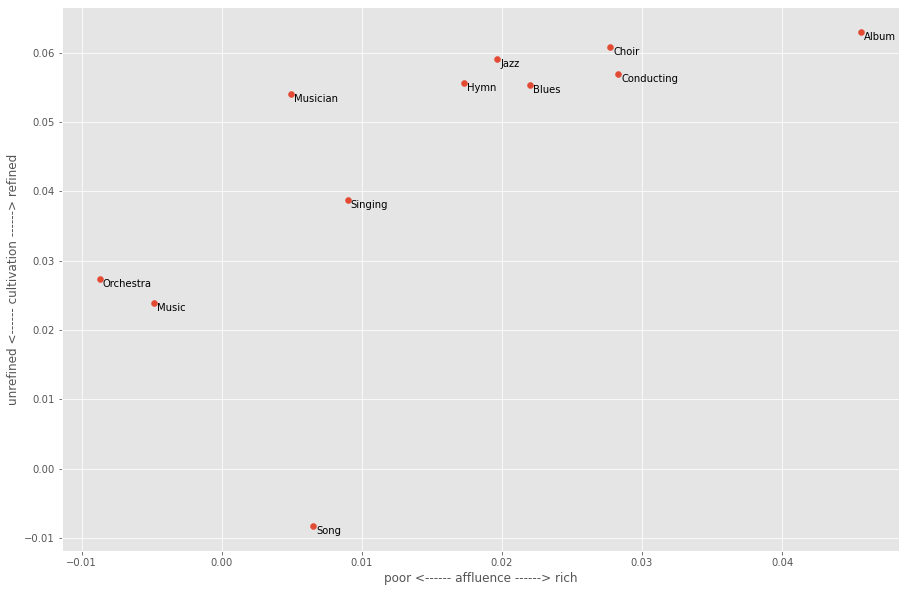

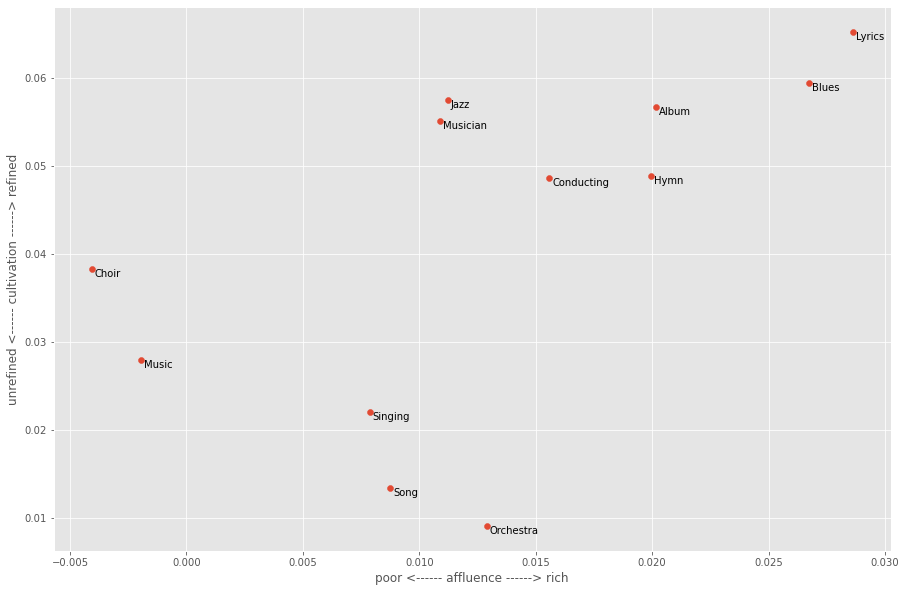

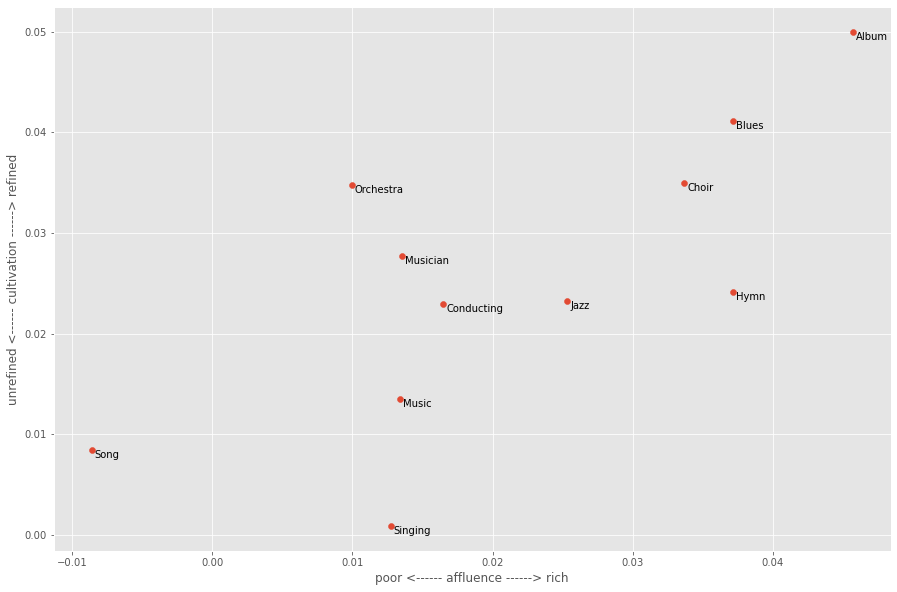

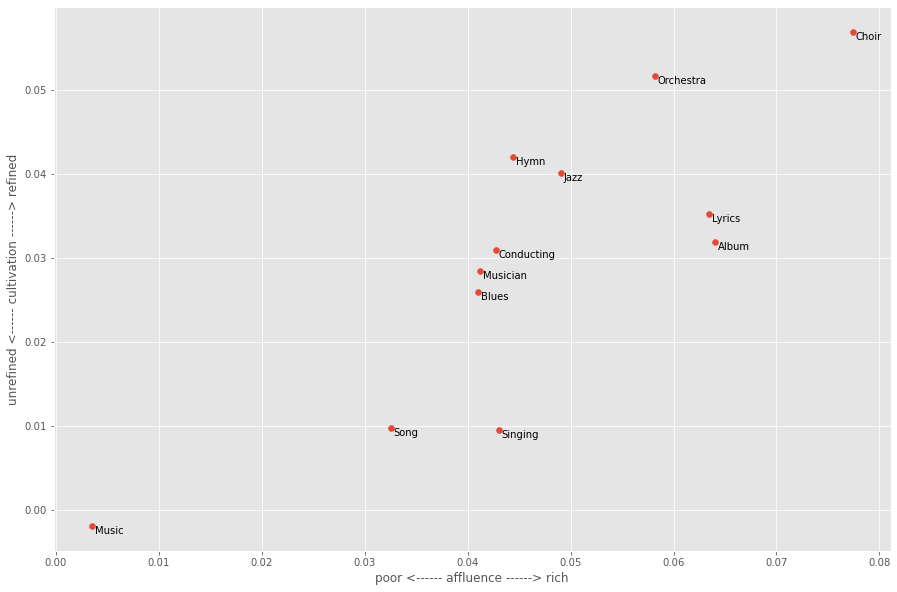

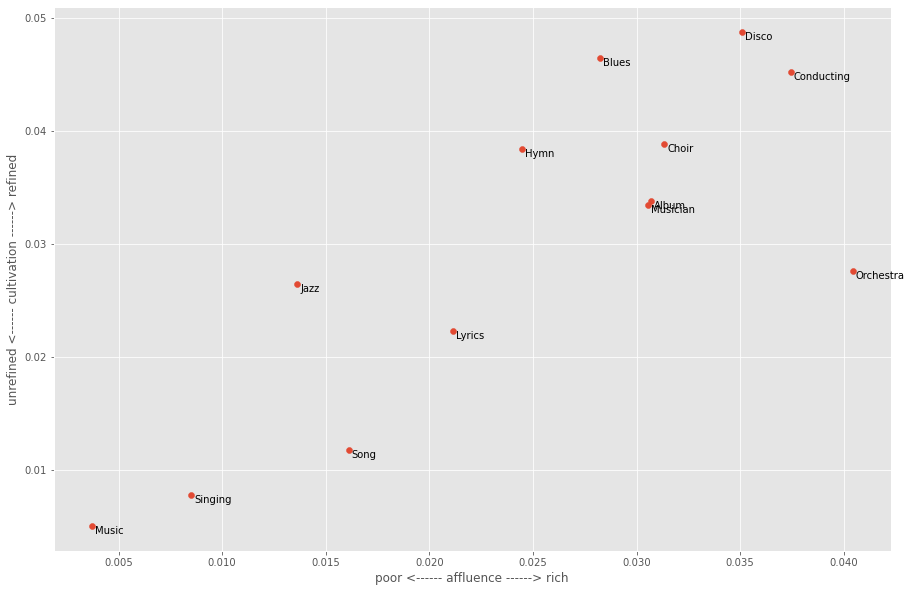

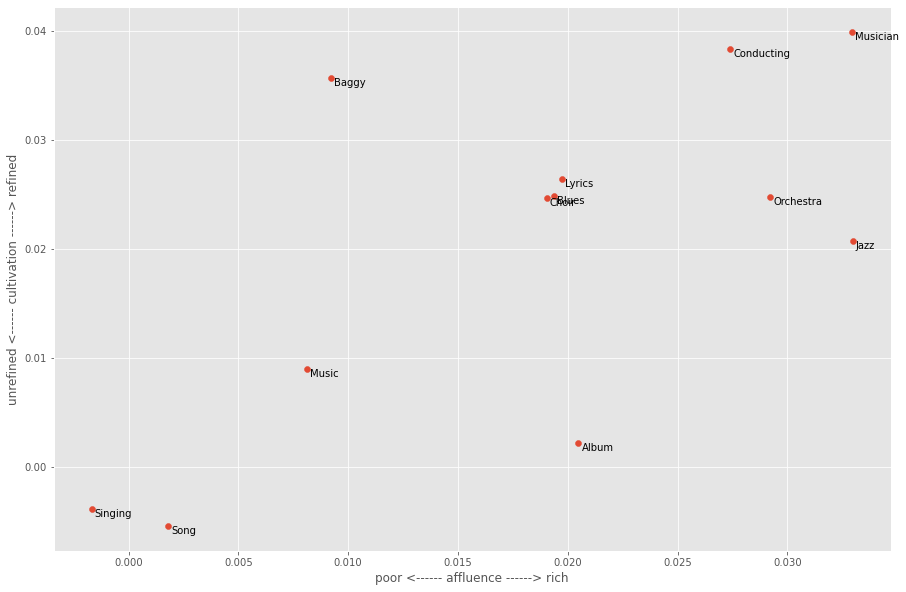

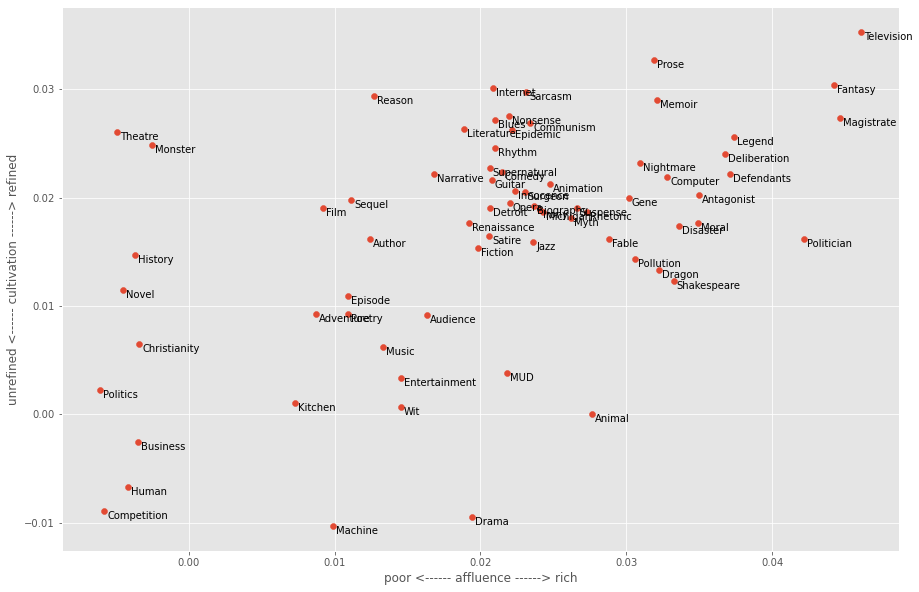

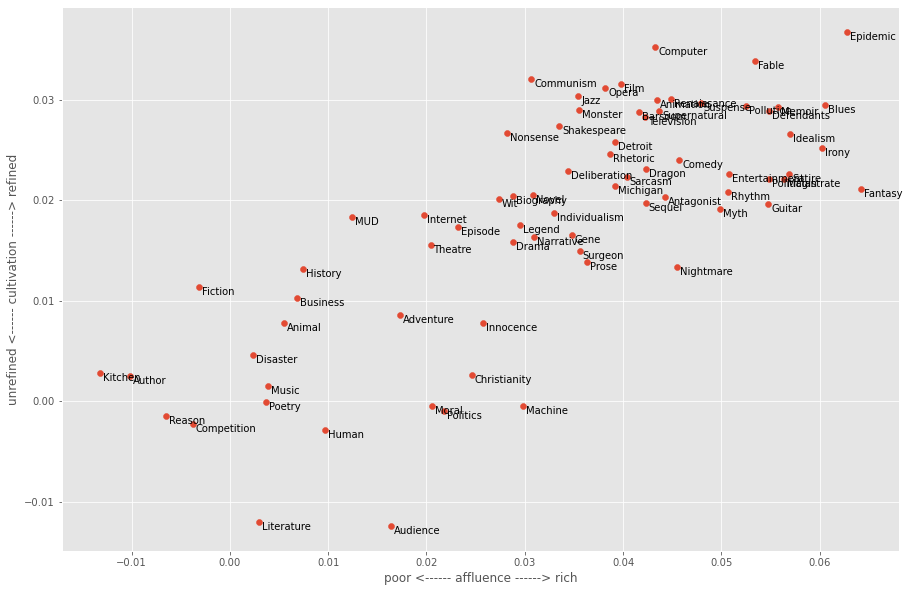

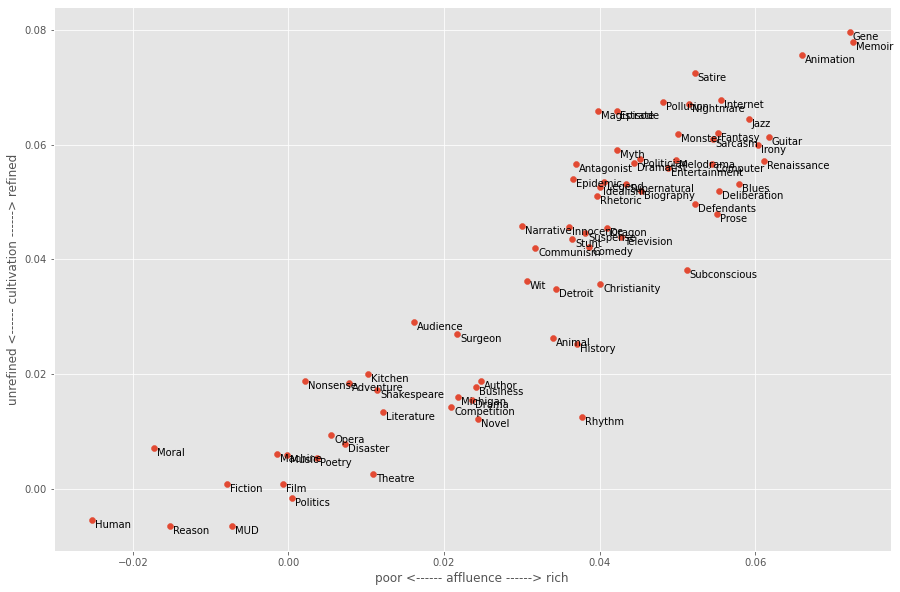

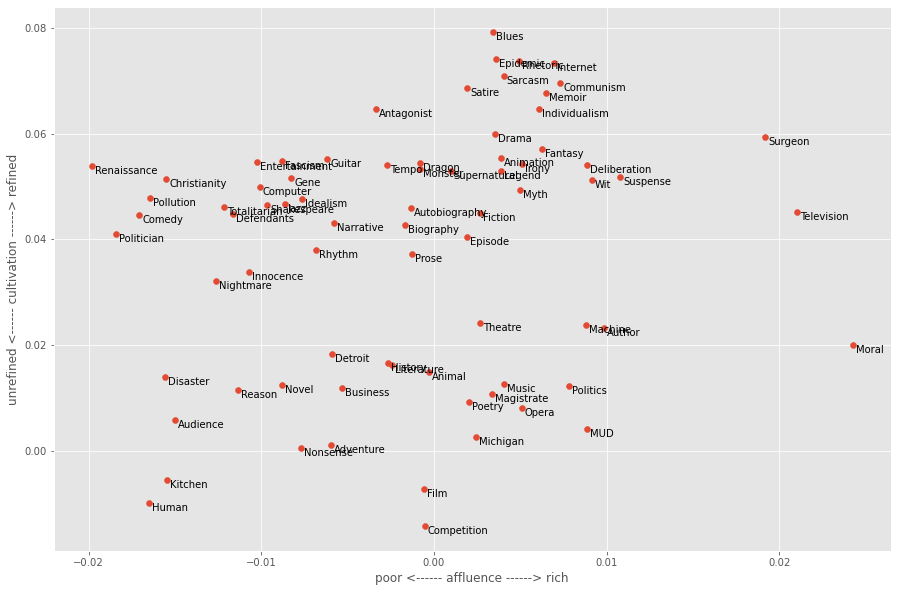

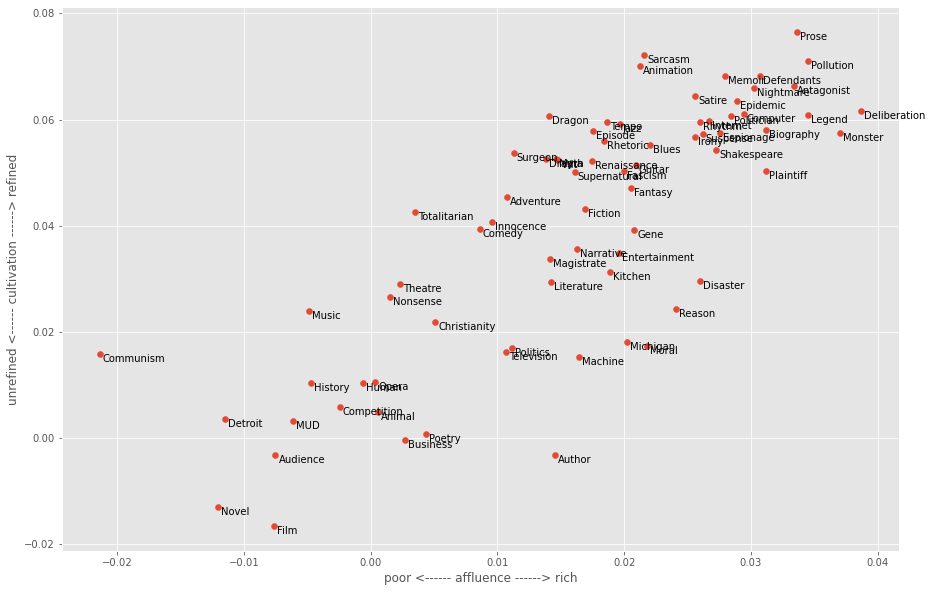

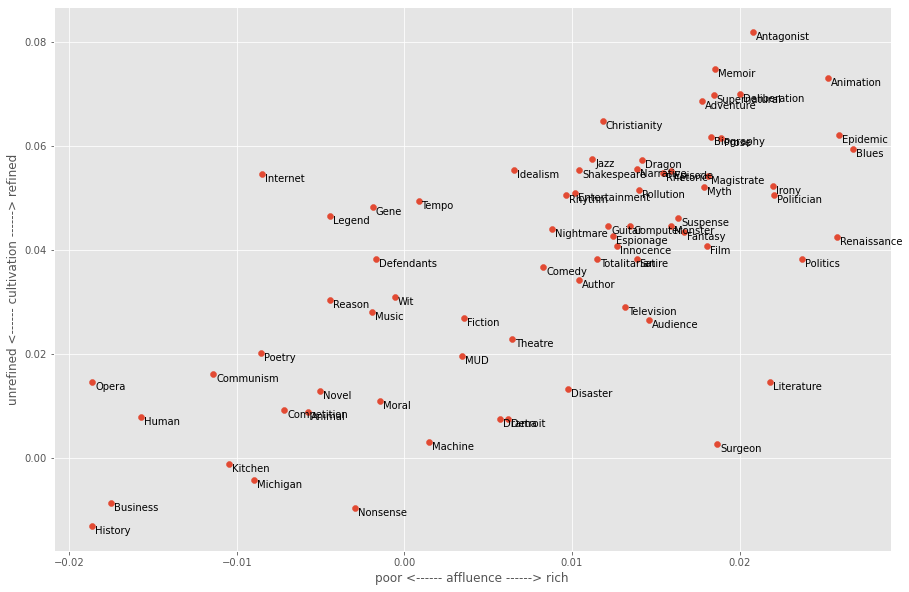

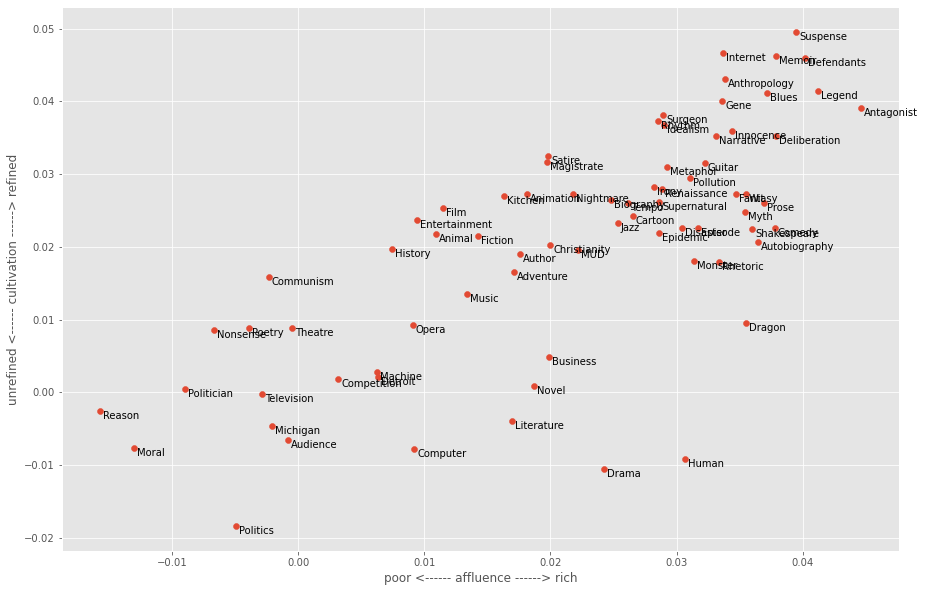

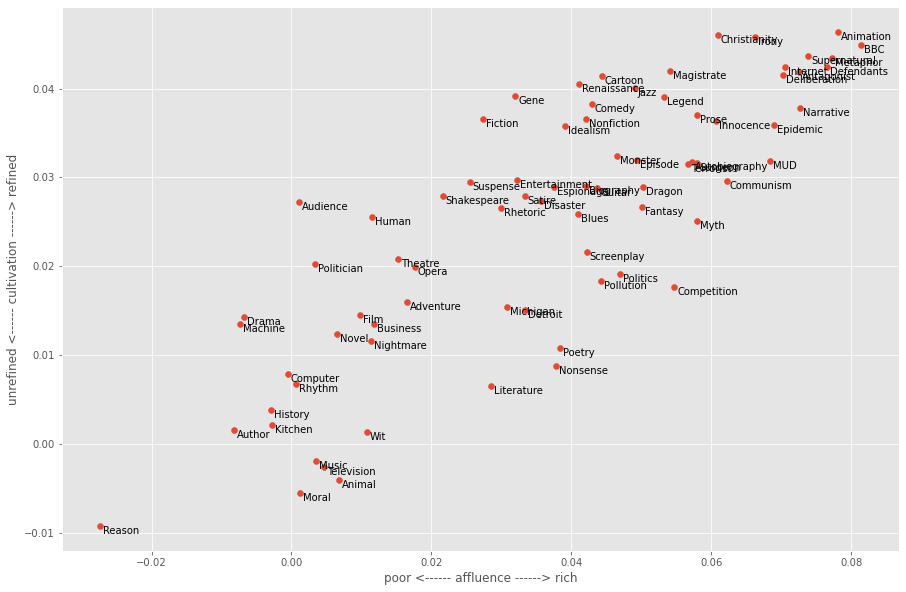

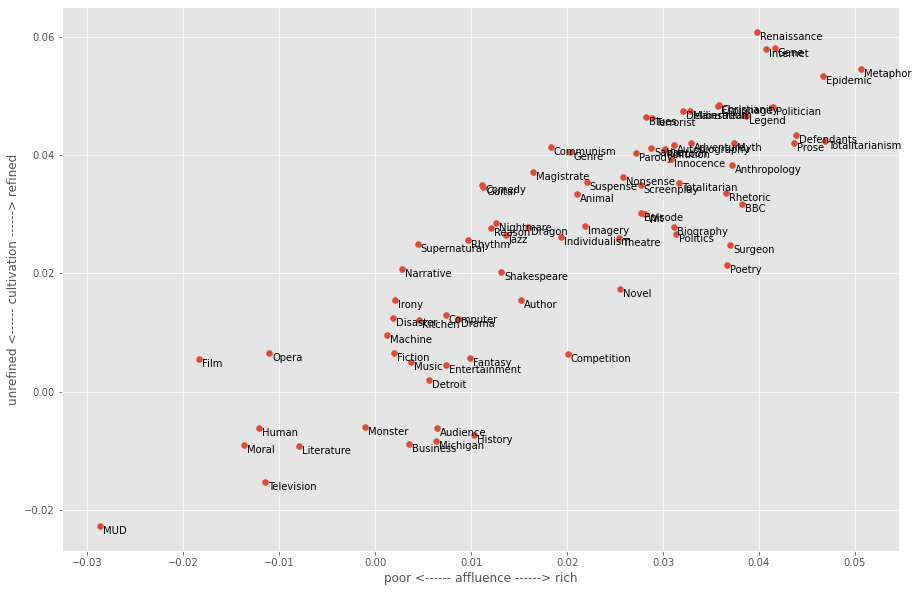

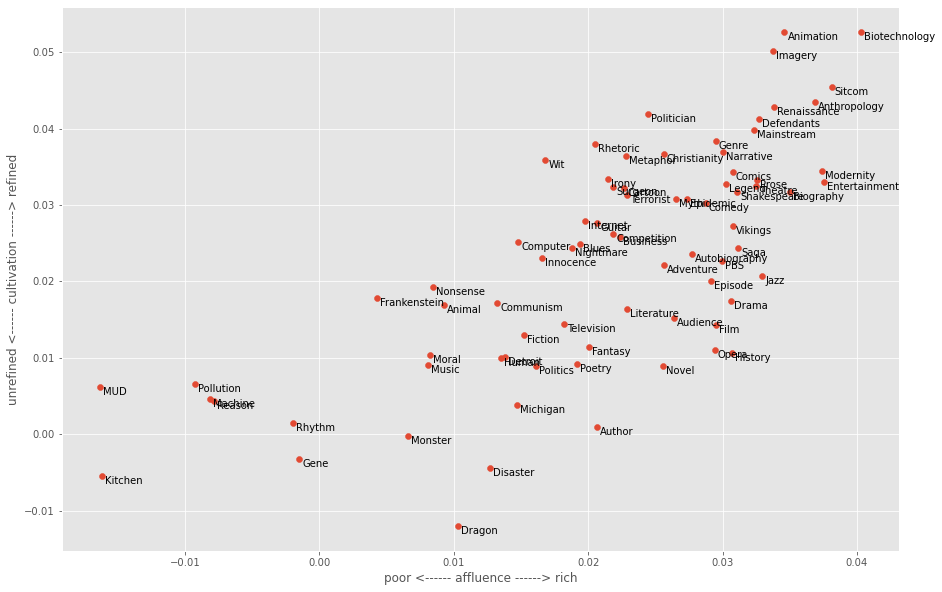

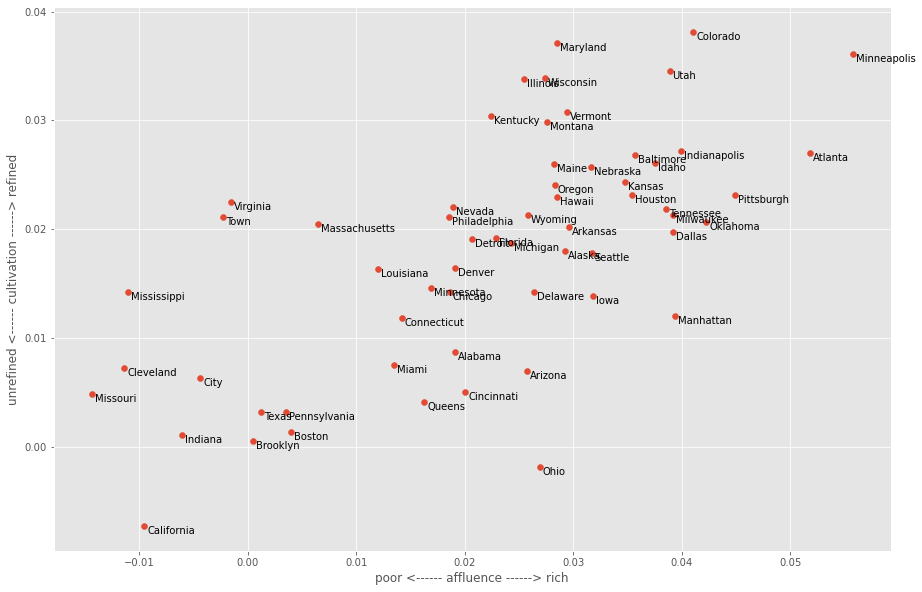

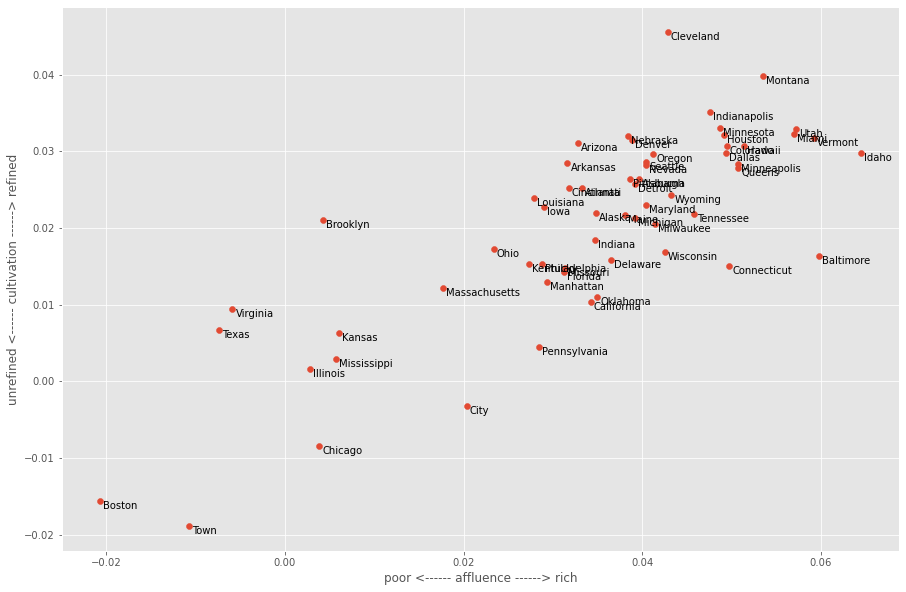

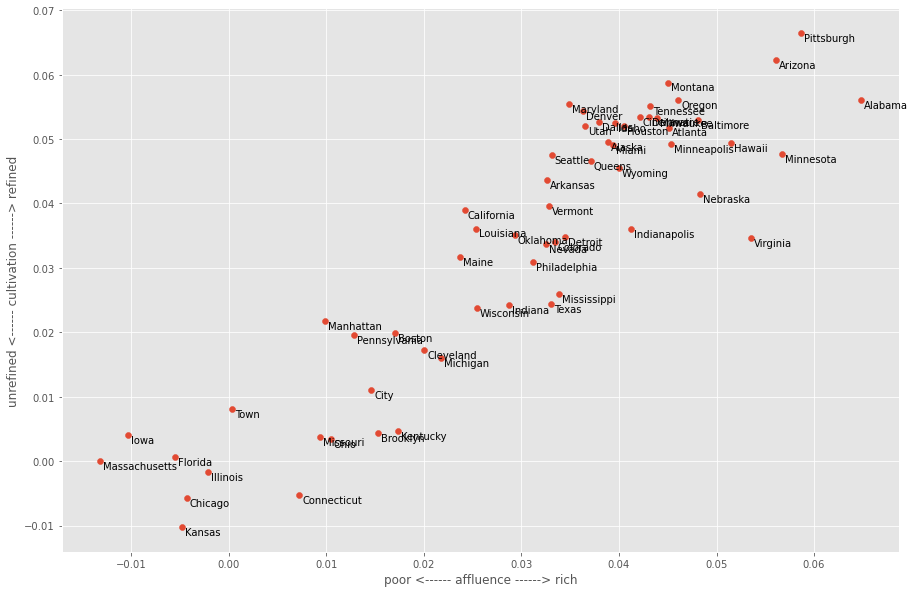

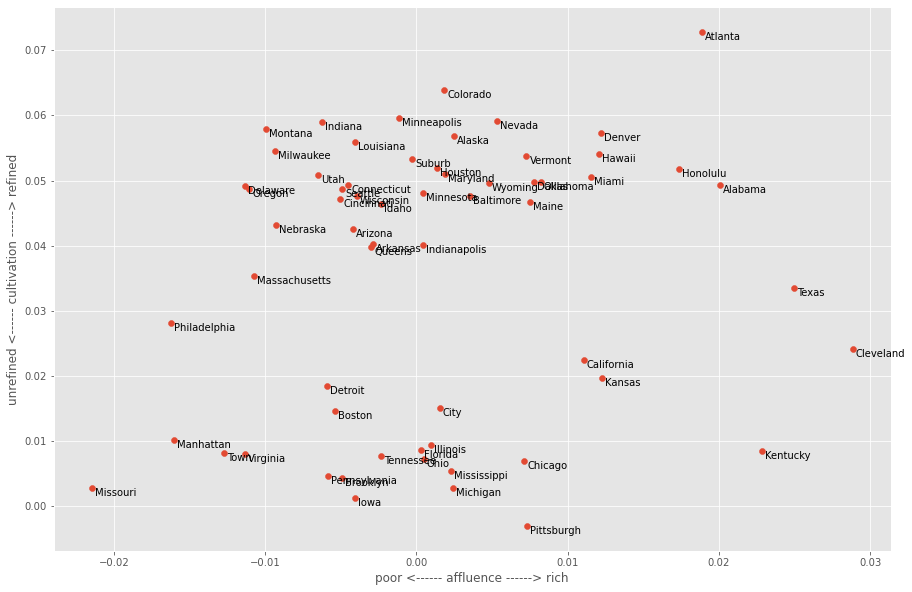

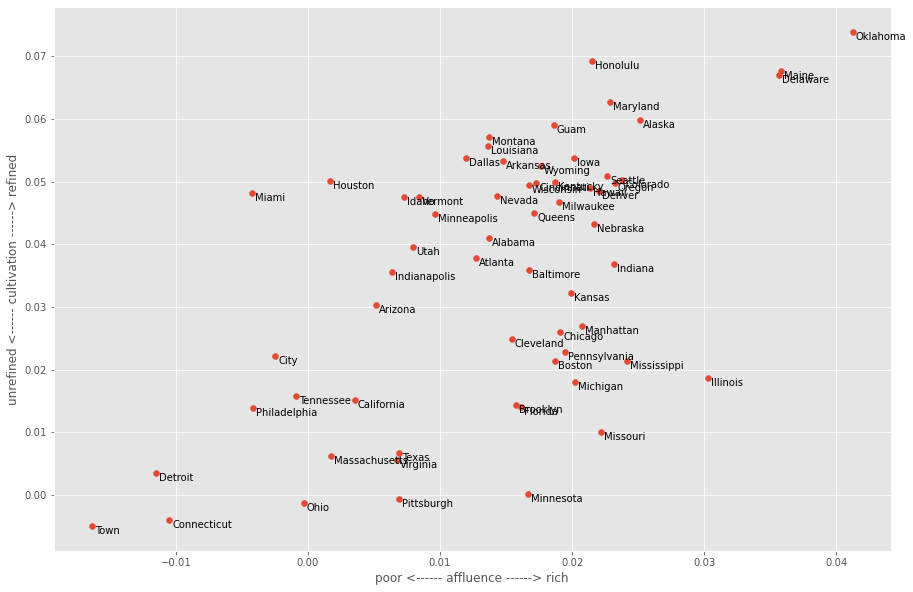

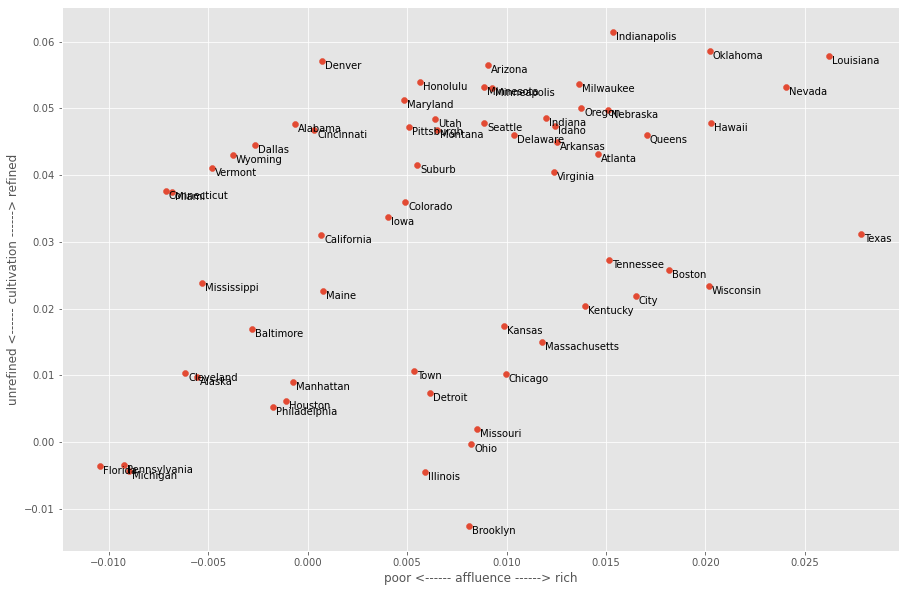

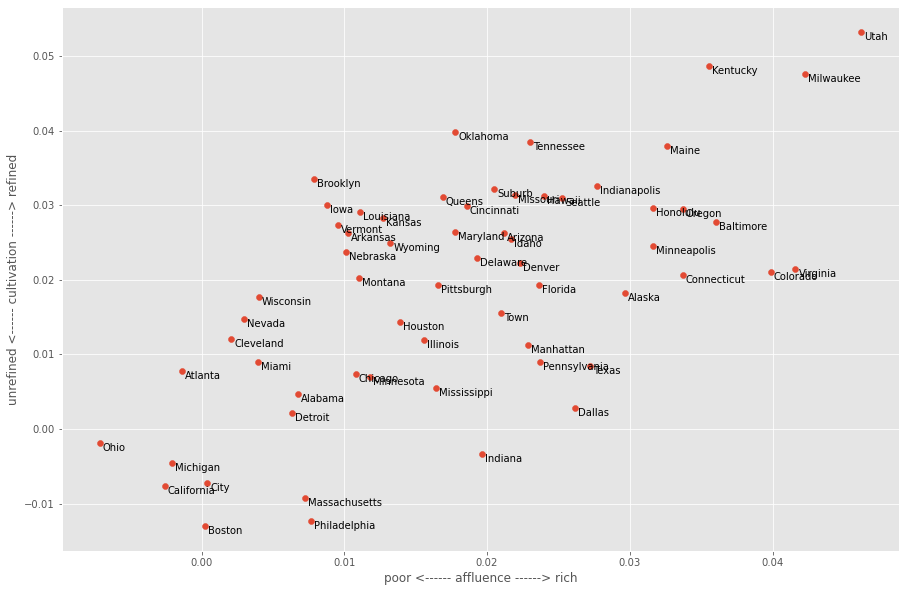

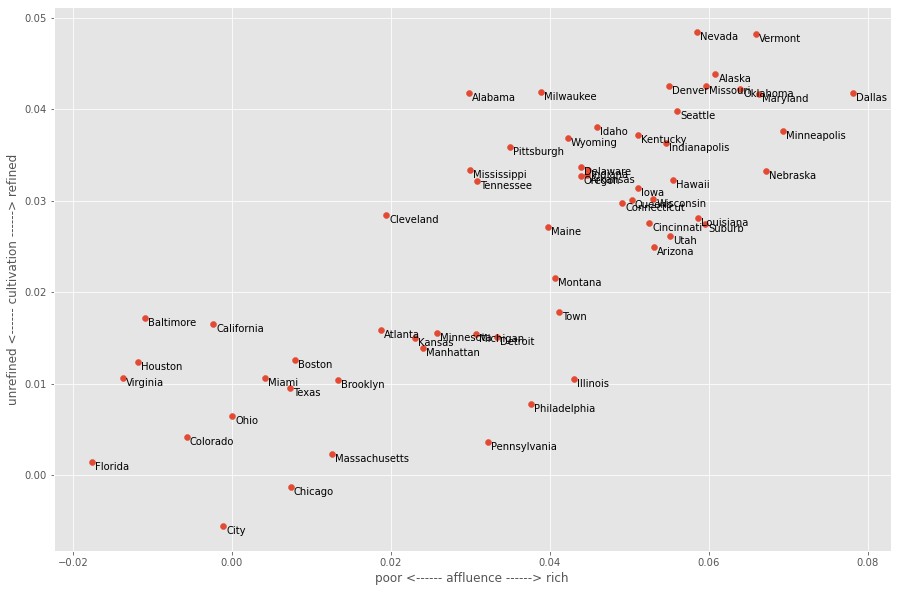

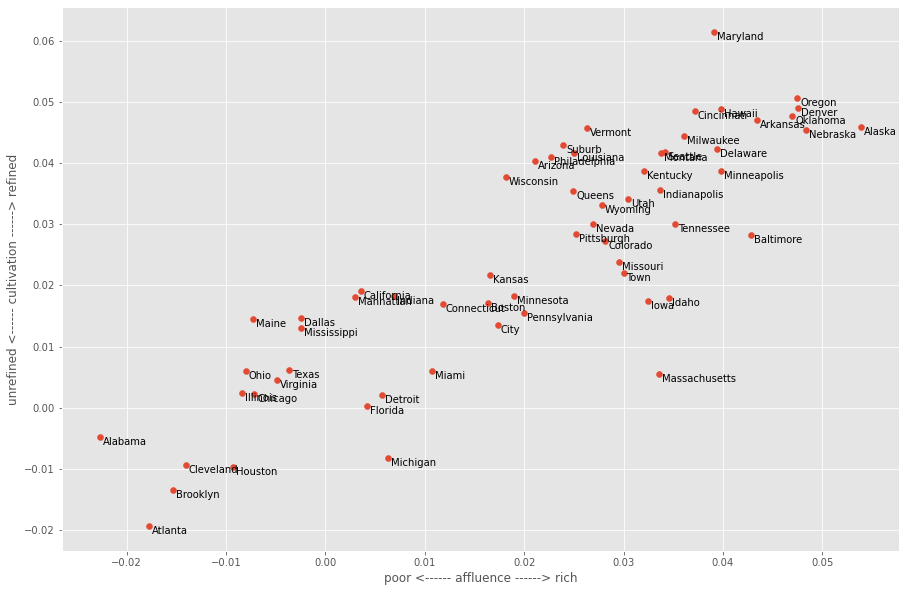

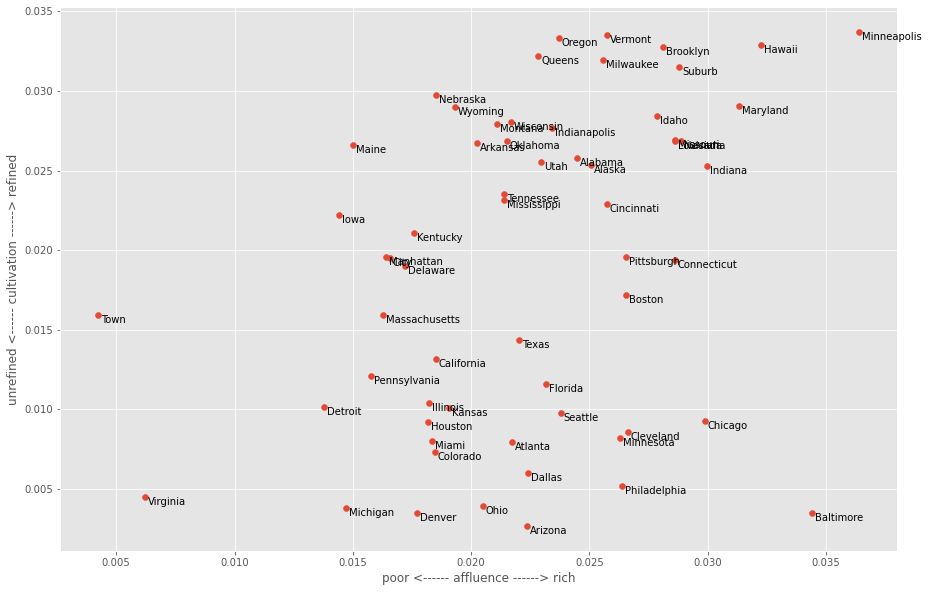

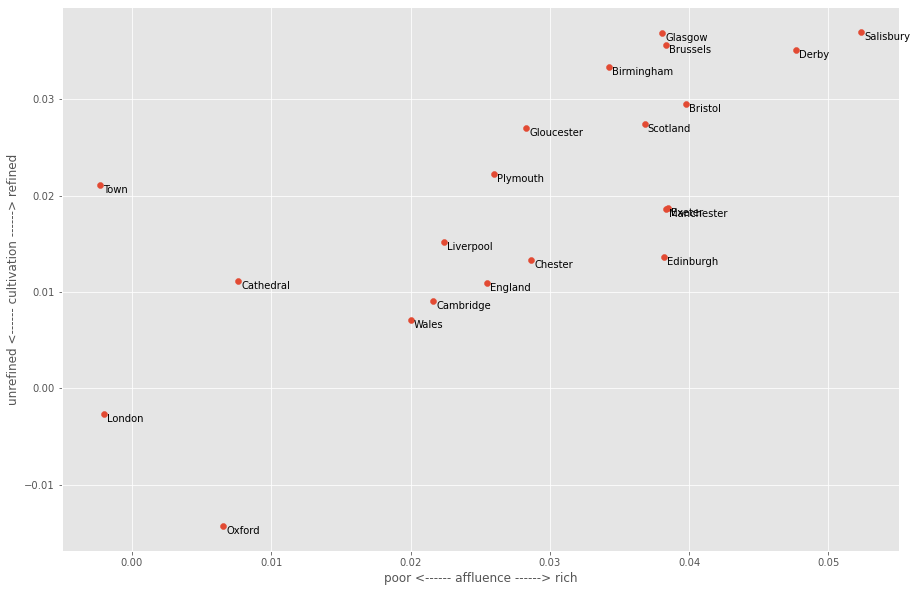

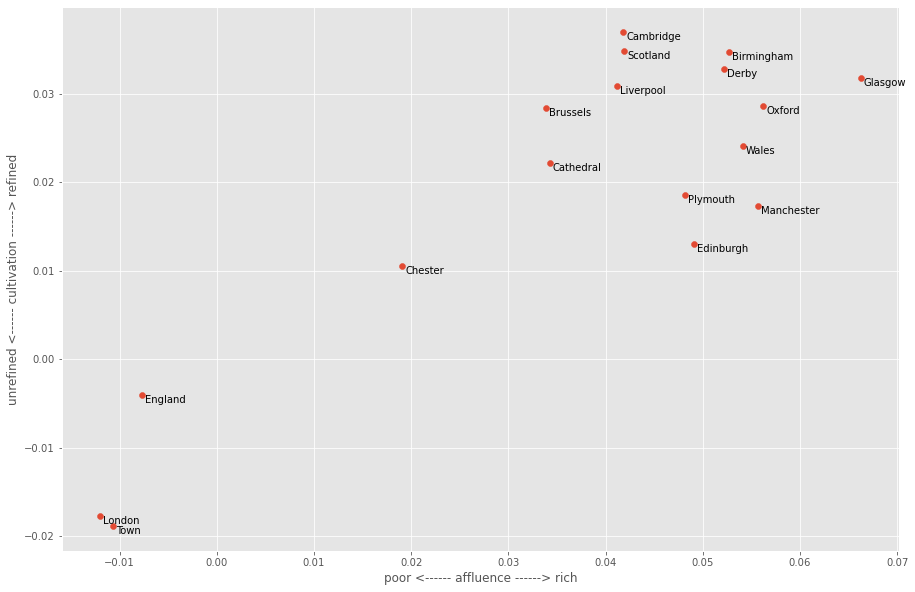

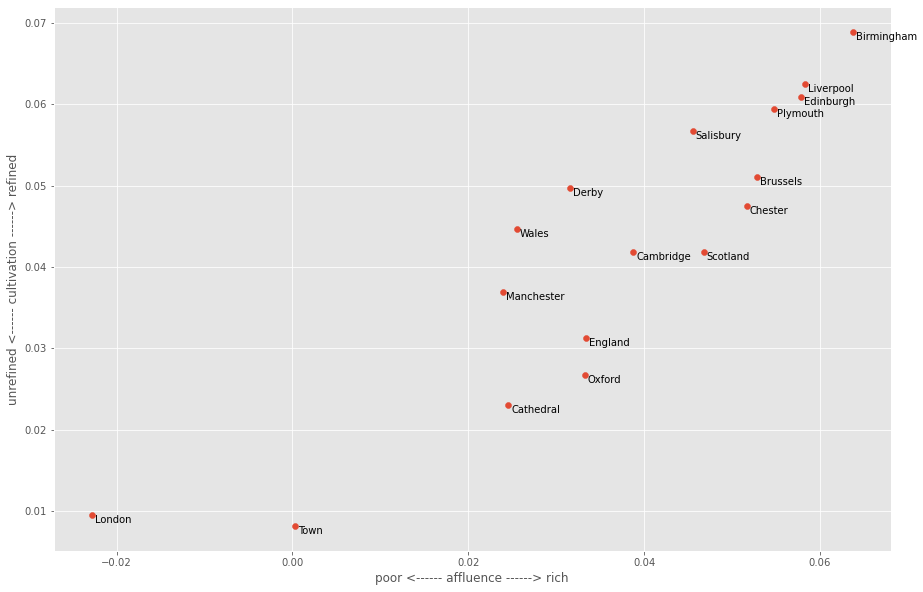

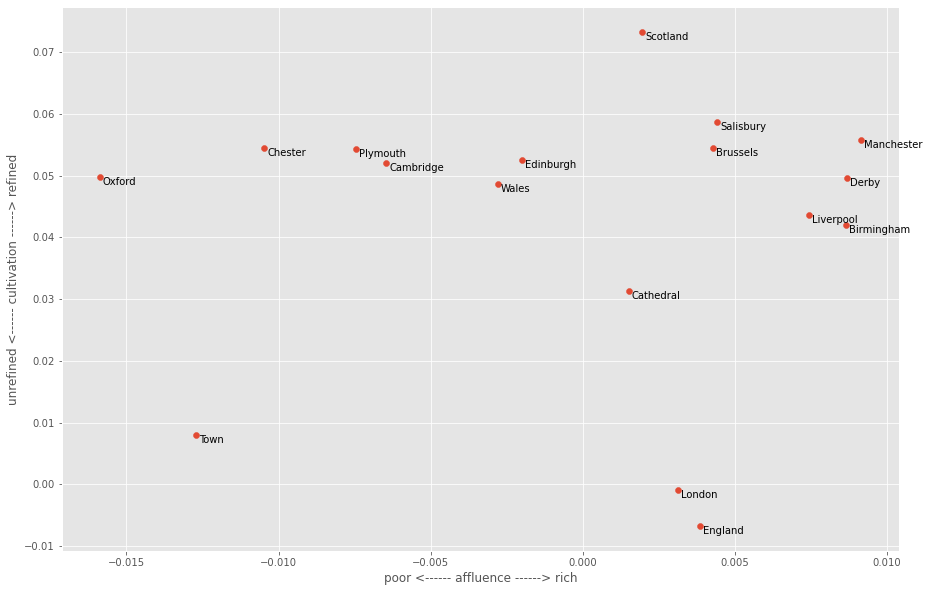

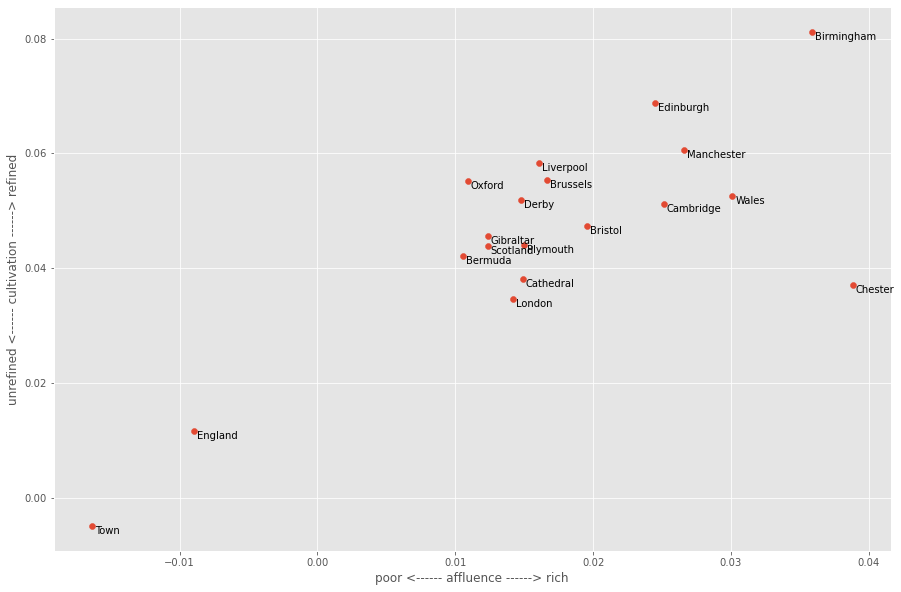

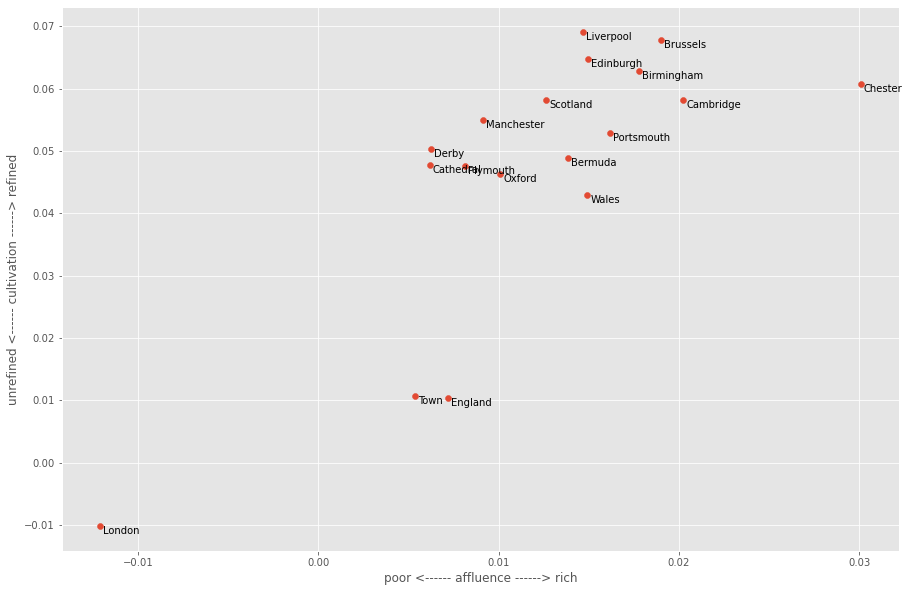

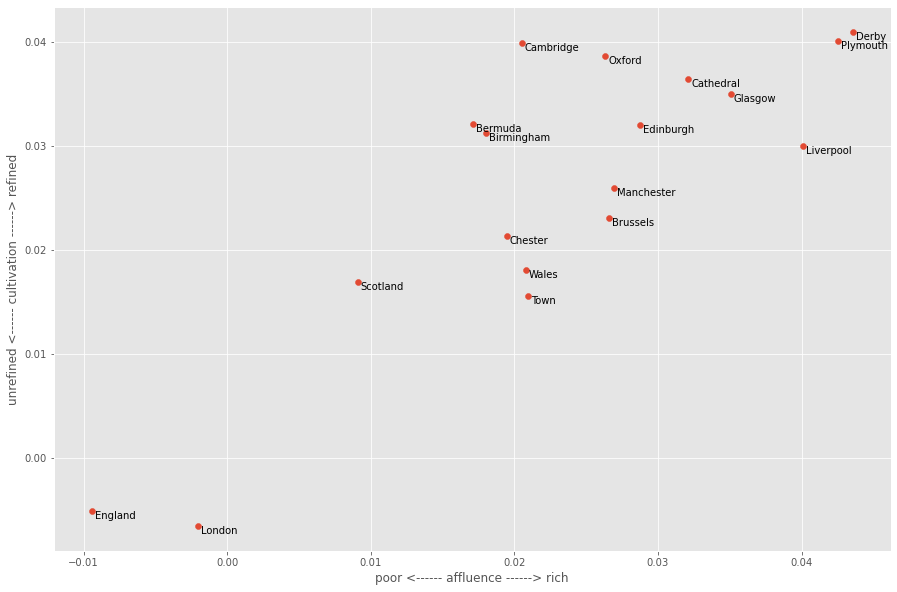

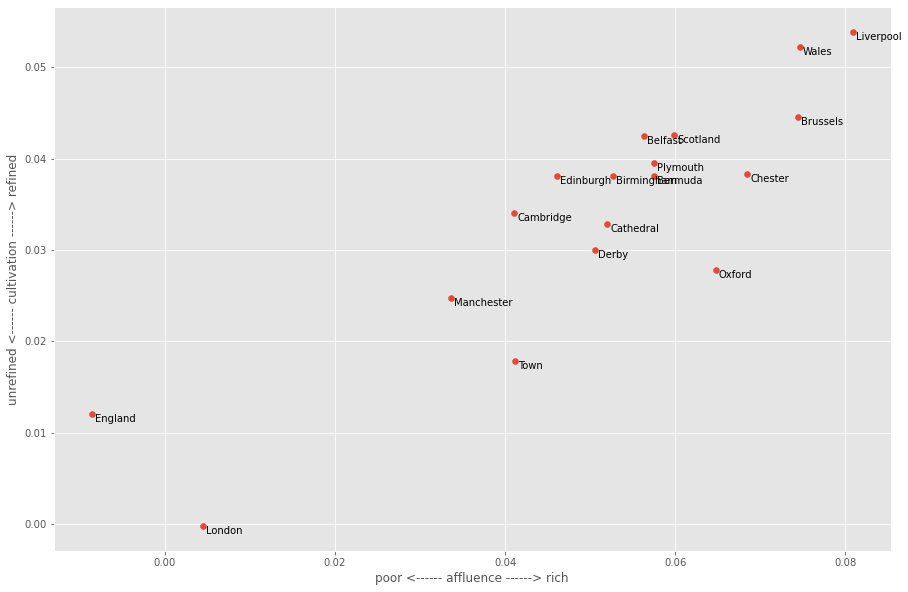

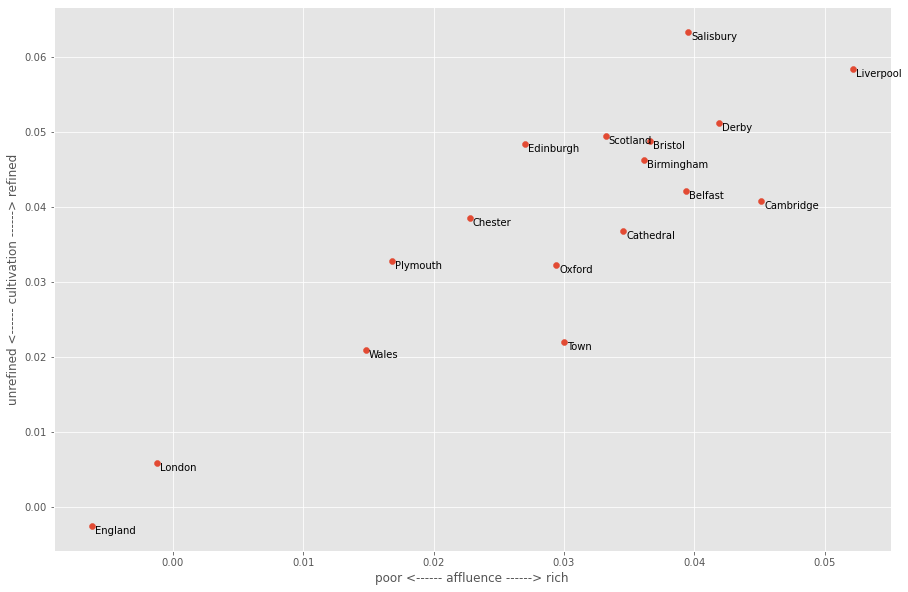

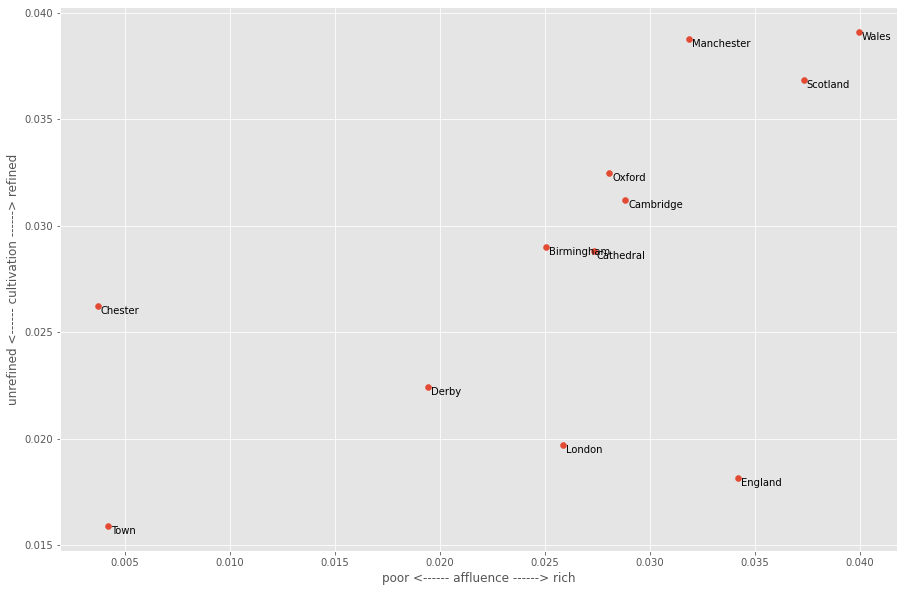

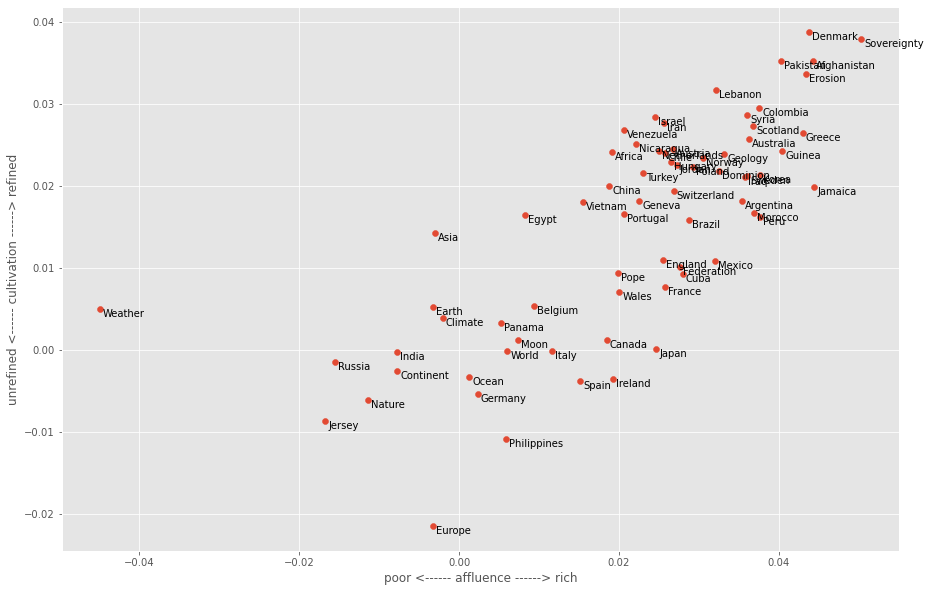

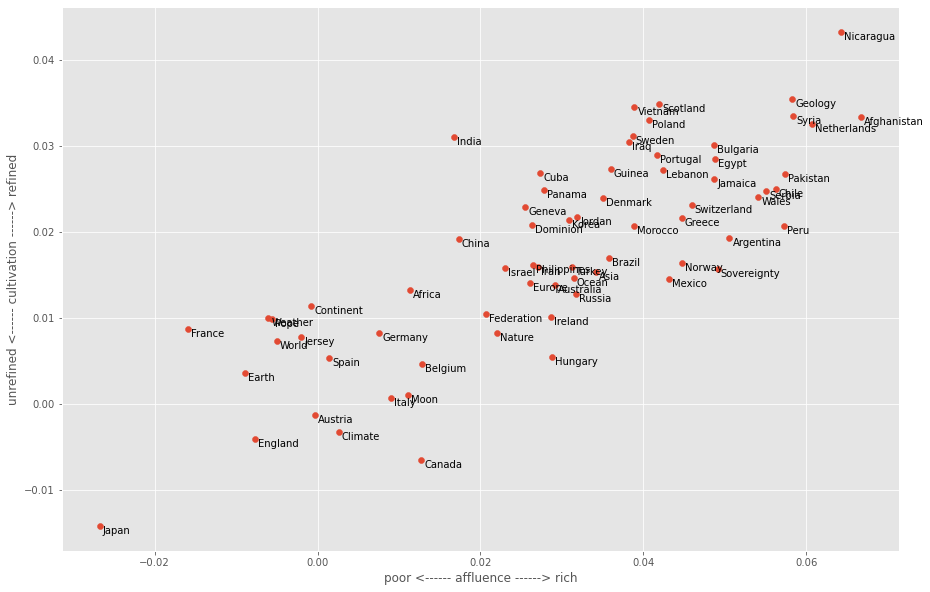

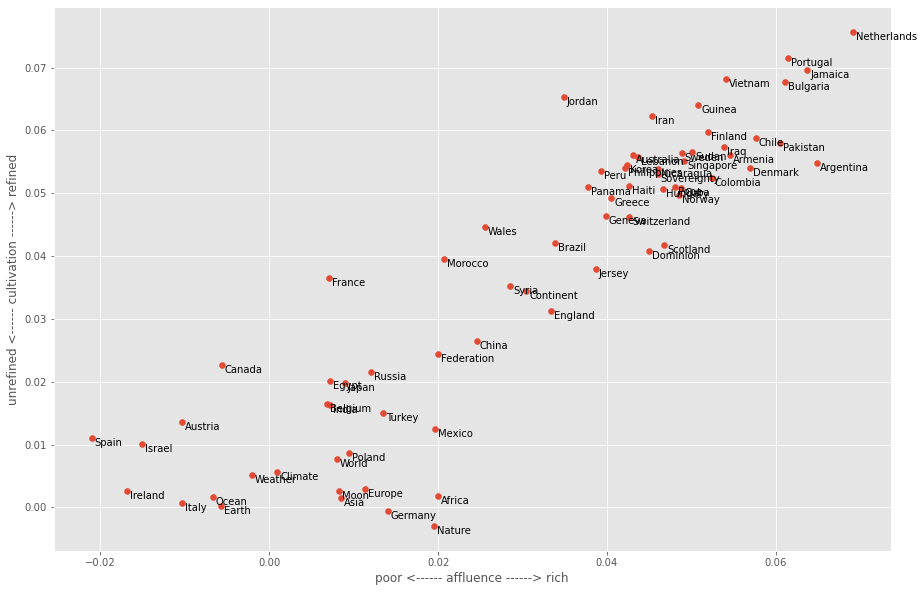

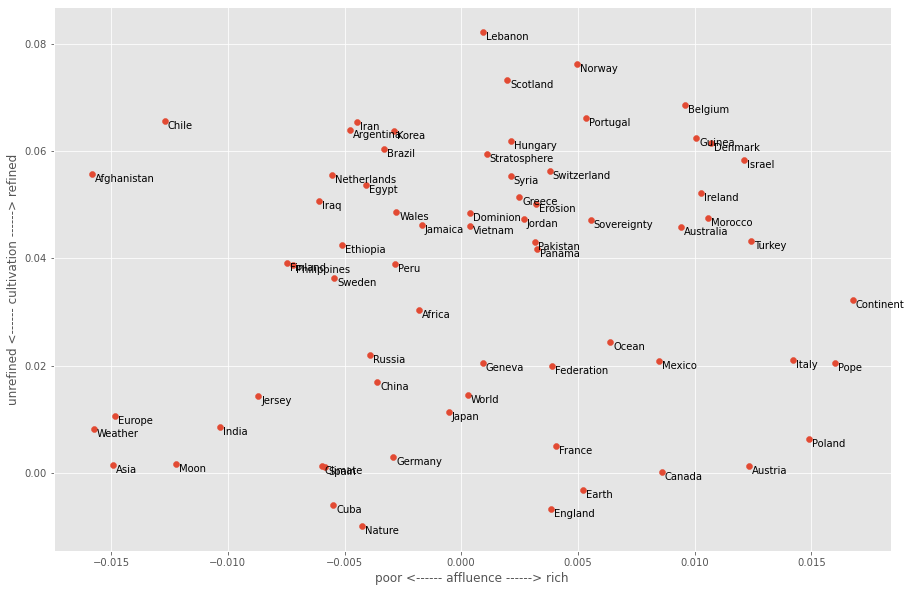

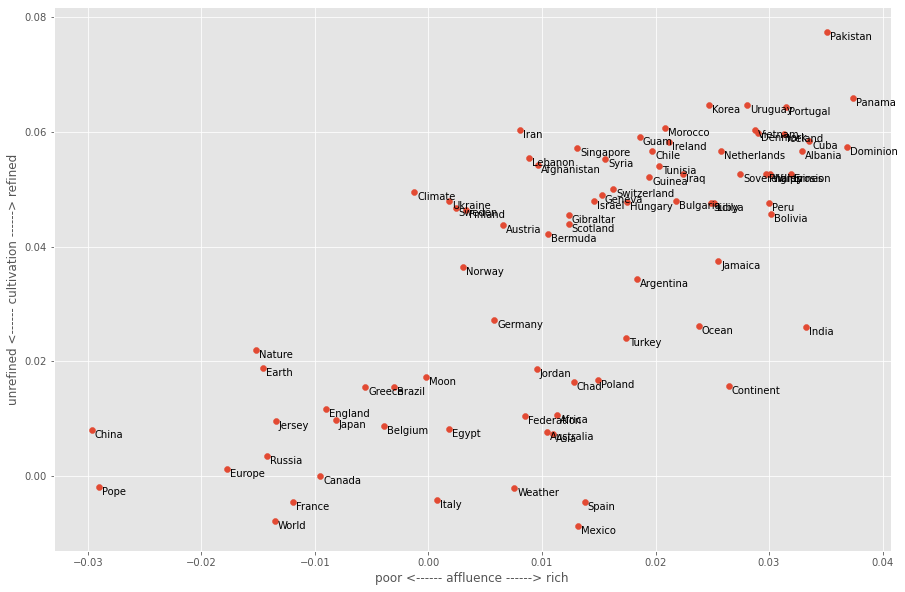

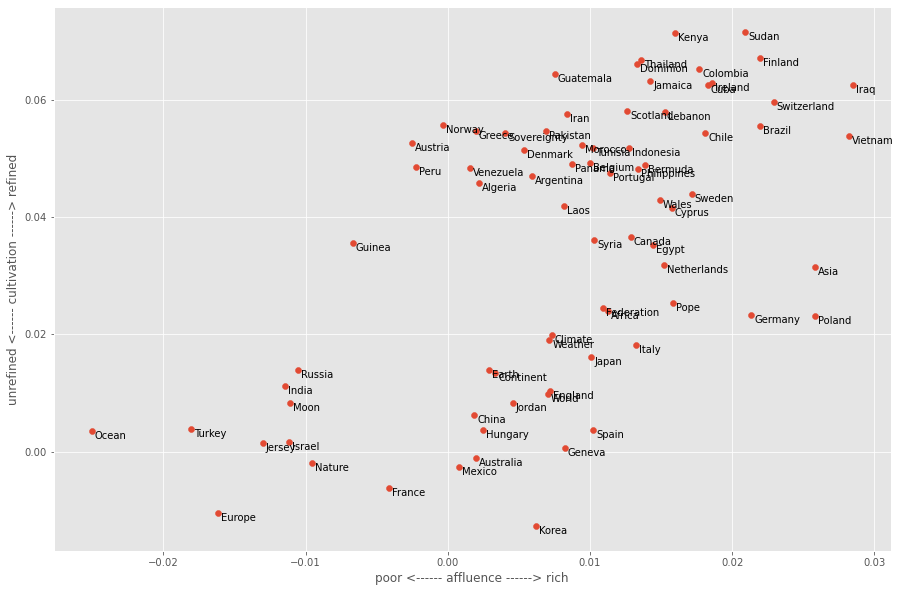

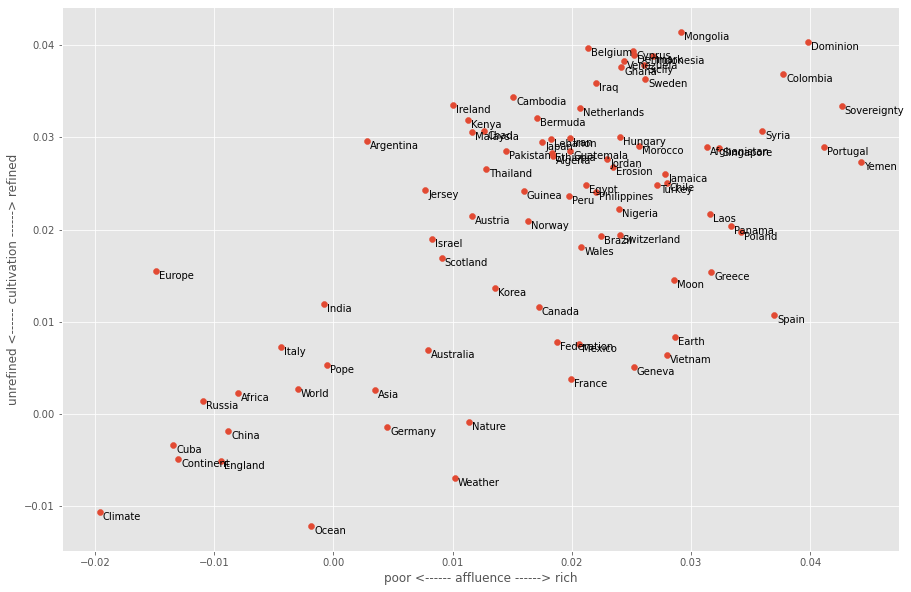

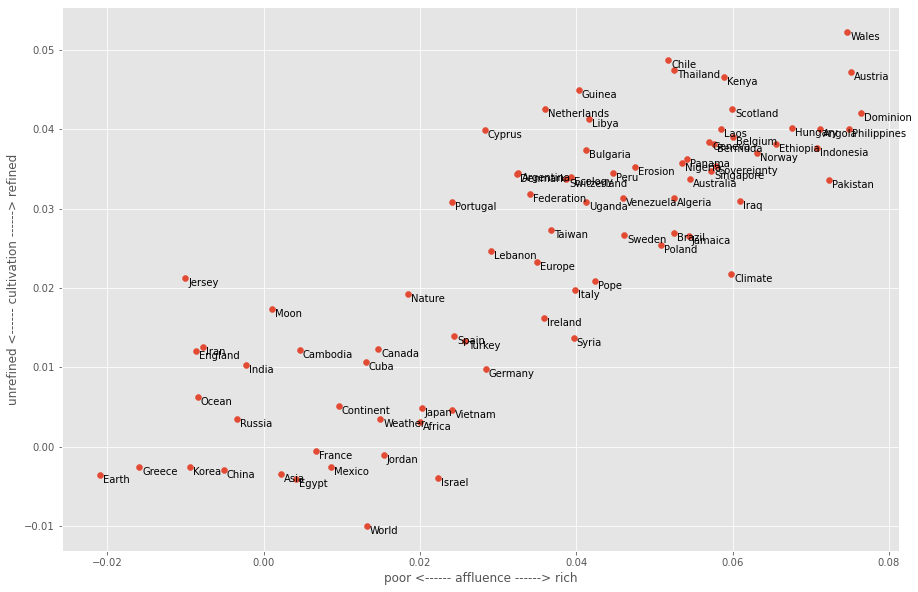

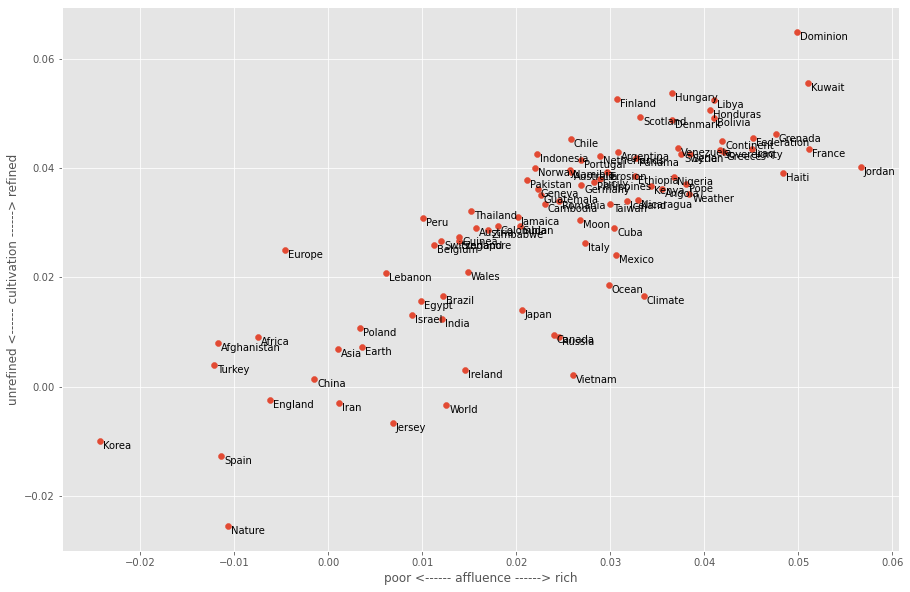

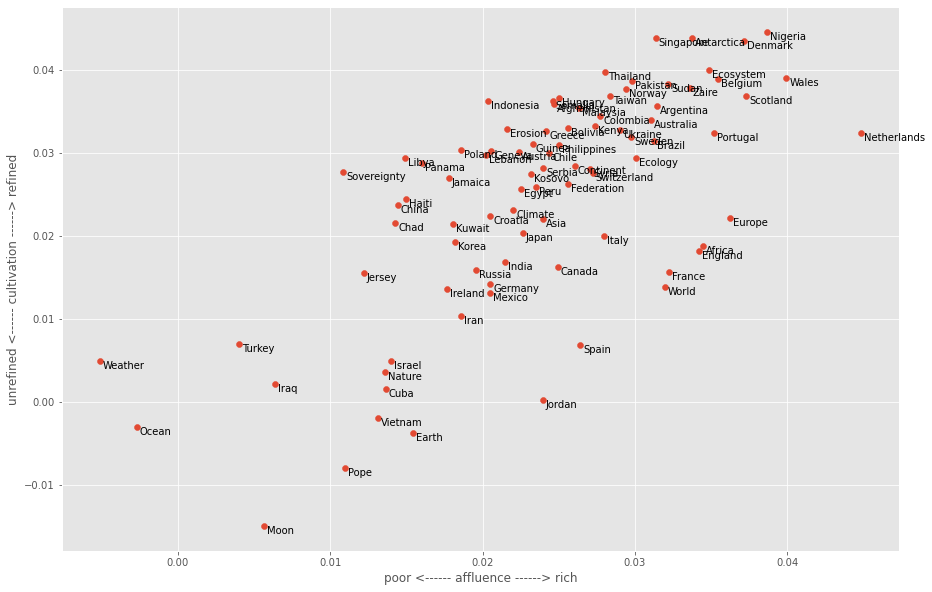

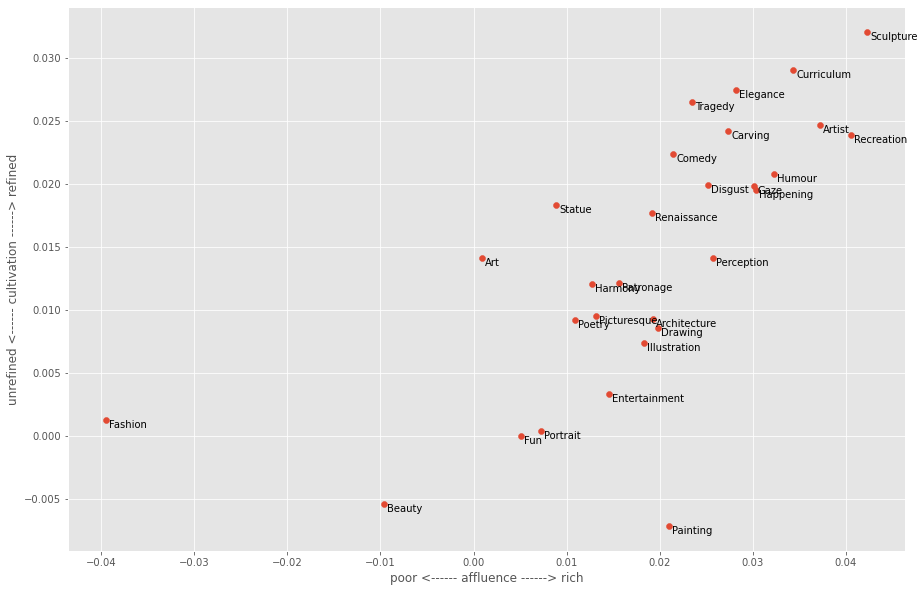

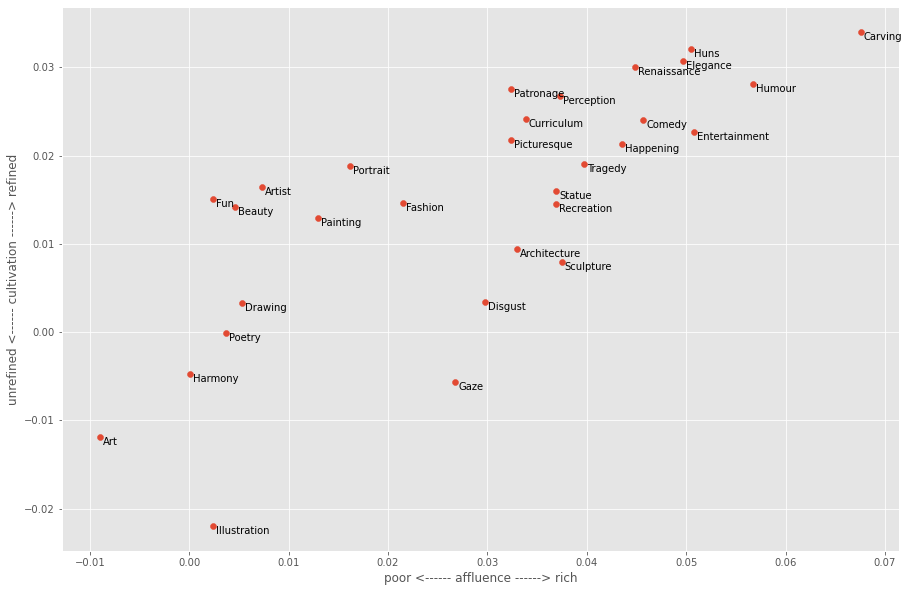

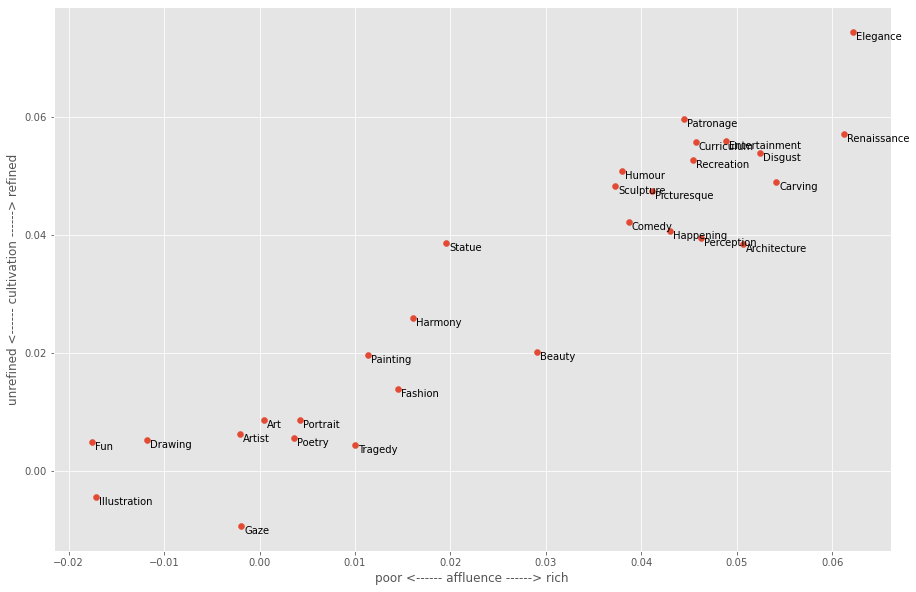

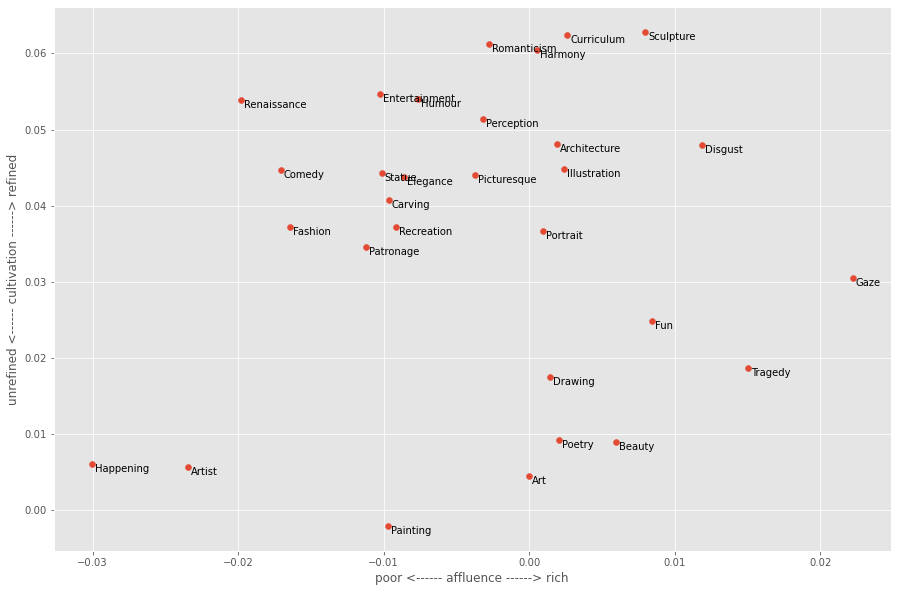

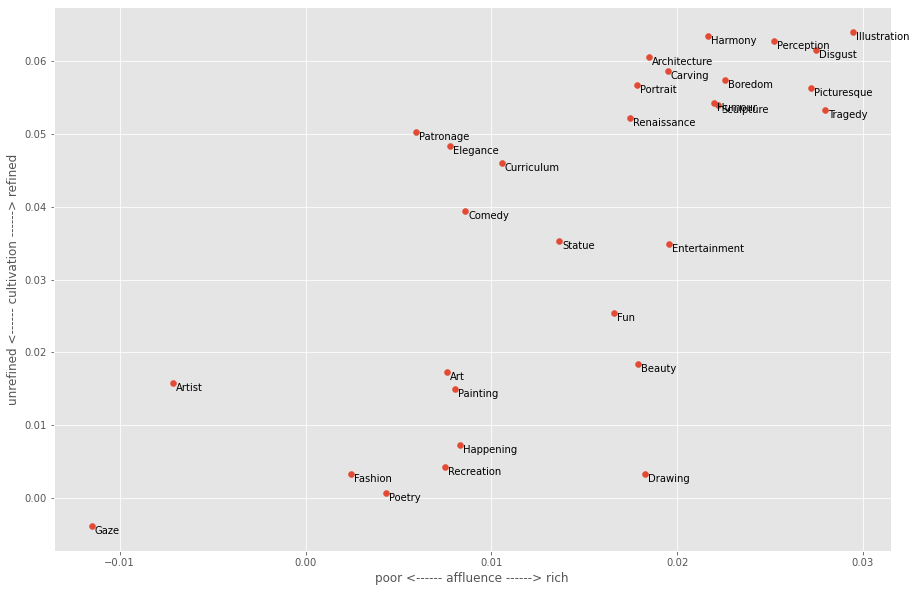

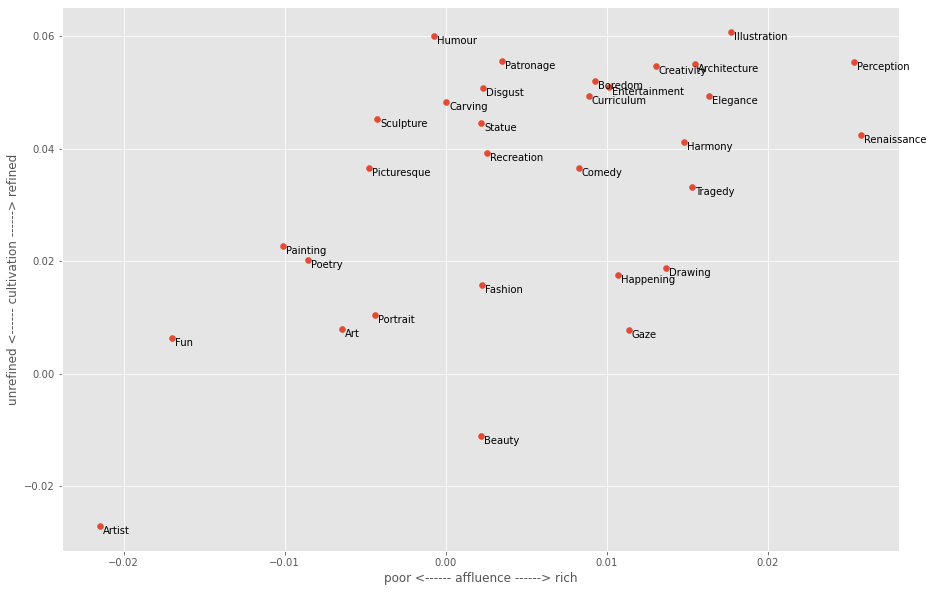

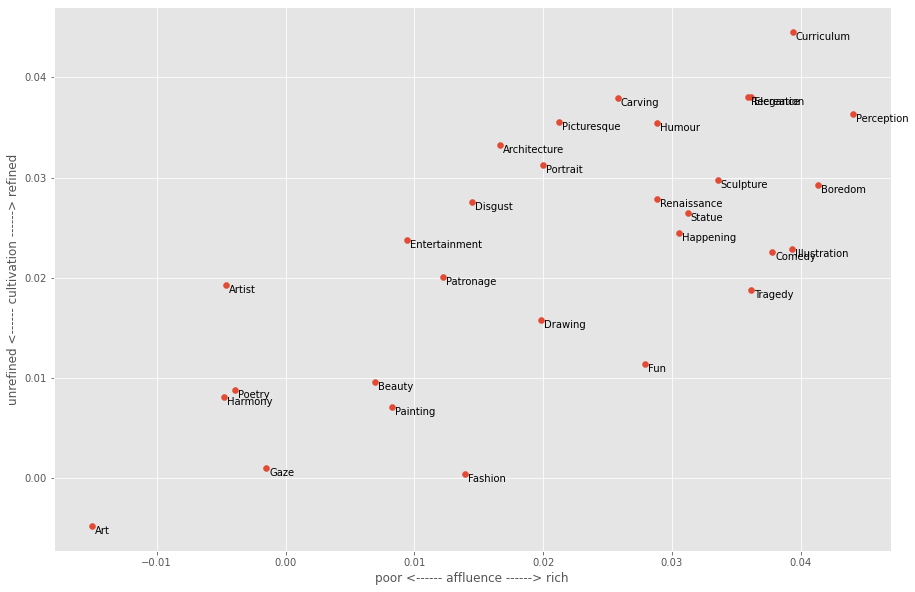

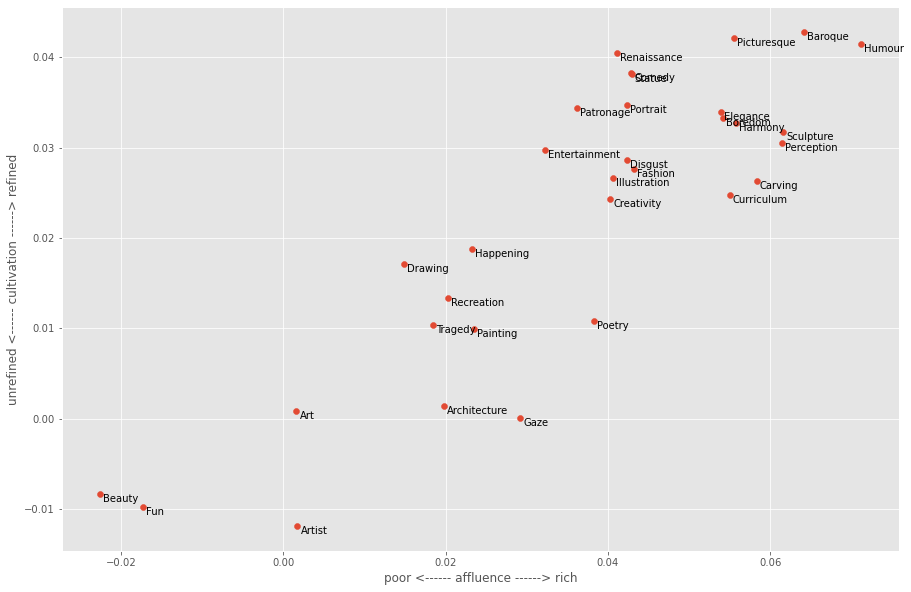

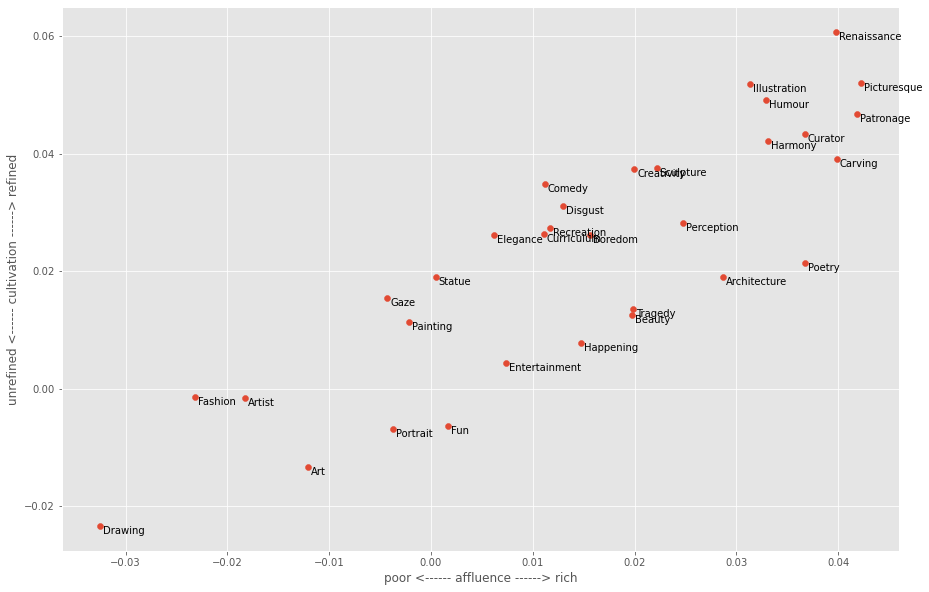

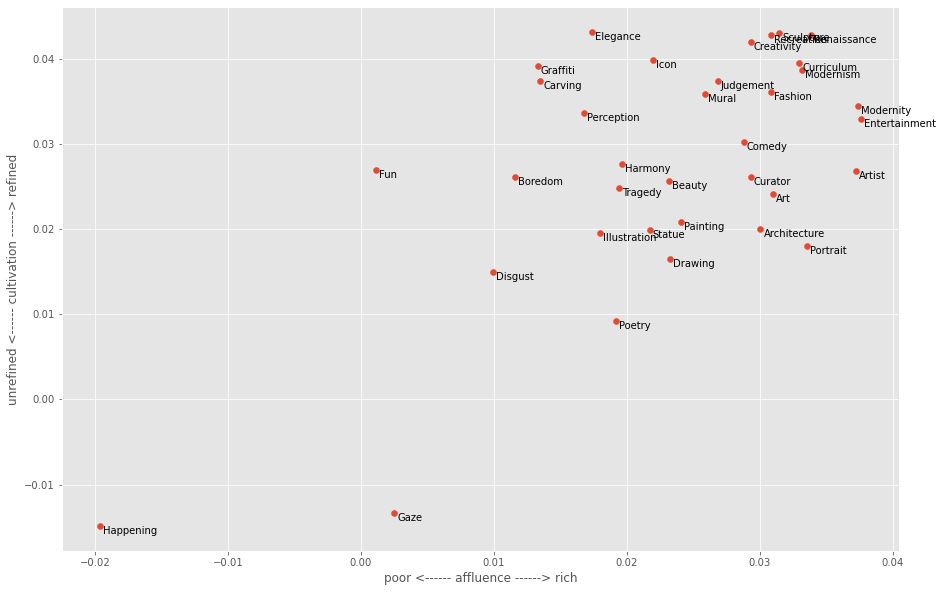

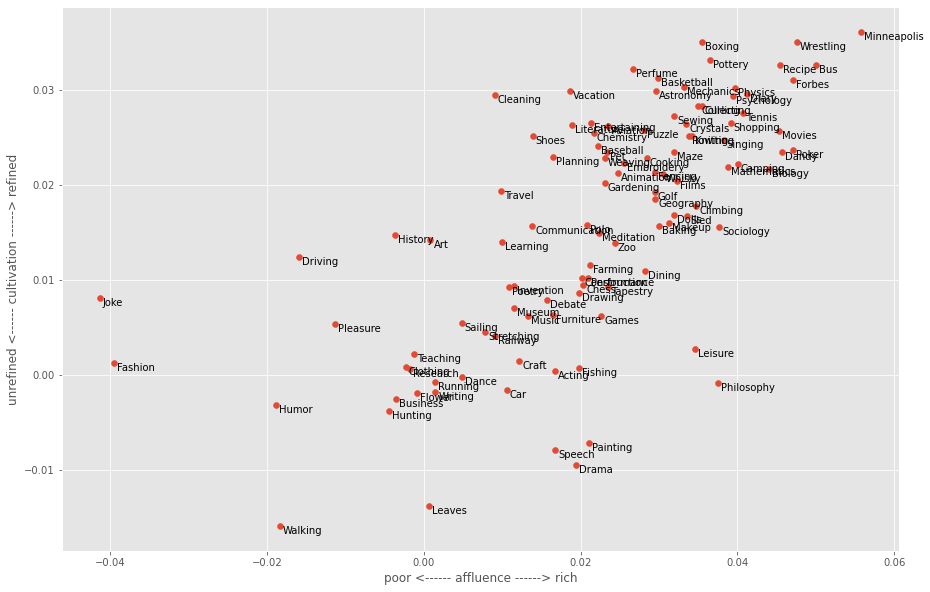

In [ ]:
for dim_1 in dims:
    for dim_2 in dims:
        if dim_1 == dim_2:
            continue
        for title, word_list in domain_dic.items():
            coha_all_decs.word_charts_through_time(word_list=word_list, dim_1=dim_1, dim_2=dim_2, title=title)

        
#coha_all_decs.word_charts_through_time(word_list=word_list, dim_1="affluence", dim_2="gender", title="occupations")

NameError: name 'wv' is not defined